# Time Series Analysis 📈

# What is Time Series Data and its Types?

**Before jumping right into Time Series Ananlysis , lets first understand what is Time Series Data.**

* Time-series data is a collection of data points over a set period. Plot the points on a graph, and one of your axes would always be time.
* What sets time series data apart from other data is that the analysis can show how variables change over time. 
* The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.
* In other words, time is a crucial variable because it shows how the data adjusts over the course of the data points as well as the final results. 
 It provides an additional source of information and a set order of dependencies between the data.

* The time series data may be of three types:-
1.  **Time series data** - The observations of the values of a variable recorded at different points in time is called time series data.
1.  **Cross sectional data** - It is the data of one or more variables recorded at the same point in time. Ex:-gross annual income for each of 1000 randomly chosen households in New York City for the year 2000.
1.  **Pooled data**- It is the combination of time series data and cross sectional data.

![Example](https://miro.medium.com/max/1286/1*16ZVajQnFAAs_wHM99jiaA.png)

# What is Time Series Analysis ? 

**Now that we have understood what Time Series data means .. lets understand what is Time Series analysis?**
* Time-series analysis is a method of analyzing data to extract useful statistical information and characteristics. 
* A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. 
* Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.
* One of the study's main goals is to predict future value.

Examples of time series analysis:

    Electrical activity in the brain
    Rainfall measurements
    Stock prices
    Number of sunspots
    Annual retail sales
    Monthly subscribers
    Heartbeats per minute
    
# Why organizations use time series data analysis?

* Time series analysis helps organizations understand the underlying causes of trends or systemic patterns over time. 
* Using data visualizations, business users can see seasonal trends and dig deeper into why these trends occur.
* When organizations analyze data over consistent intervals, they can also use time series forecasting to predict the likelihood of future events.  

# Time Series Analysis Types

Some of the models of time series analysis include - 

**1 Classification**: It identifies and assigns categories to the data.

**2 Curve Fitting**: It plots data on a curve to investigate the relationships between variables in the data.

**3 Descriptive Analysis**: Patterns in time-series data, such as trends, cycles, and seasonal variation, are identified.

**4 Explanative analysis**: It attempts to comprehend the data and the relationships between it and cause and effect.

**5 Segmentation**: It splits the data into segments to reveal the source data's underlying properties. 


# Components of a Time-Series

1. **Trend** - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).
1. **Seasonality** - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.
1. **Noise** - Outliers or missing values
1. **Cyclical Component** - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.
1. **Irregular Variation** - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.
1. **ETS Decomposition** - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.

![](https://editor.analyticsvidhya.com/uploads/89638Everything%20in%20a%20single%20picture_2.jpg)

**In this notebook we will work on Stock market prediction using S&P 500 historical data**

In [1]:
# importing libraries

import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#All necessary plotly libraries
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# stats tools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Arima Model
#from pmdarima.arima import auto_arima

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# LSTM 
from tensorflow import keras
from tensorflow.keras.layers import Dense,LSTM,Dropout,Flatten
from tensorflow.keras import Sequential

# Loading the dataset 

In [2]:
# Reading the dataset
df = pd.read_csv("SPX.csv")
df.head(3)

# Here u can notice that our initial trading date is "1927-12-30" but with 0 stocks traded.

Date       Open       High        Low      Close  Adj Close  Volume
0  1927-12-30  17.660000  17.660000  17.660000  17.660000  17.660000       0
1  1928-01-03  17.760000  17.760000  17.760000  17.760000  17.760000       0
2  1928-01-04  17.719999  17.719999  17.719999  17.719999  17.719999       0

Before getting started with the visualization part lets understand the meaning of these feature terms :-

* **Open** -> Open means the price at which a stock started trading when the opening bell rang.
* **Close** -> Close refers to the price of an individual stock when the stock exchange closed shop for the day. It represents the last buy-sell order executed between two traders
* **High** -> The high is the highest price at which a stock is traded during a period. 
* **Low** -> The low is the lowest price of the period.
* **Adj Close** -> Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance
* **Volume** -> Volume is the total number of shares traded in a security period. 

**Why is a Stock’s Closing Price Significant?**

* Stock’s closing price determines how a share performs during the day.
* **When researching historical stock price data**, financial institutions, regulators, and individual investors **use the closing price as the standard measure of the stock’s value as of a specific date**. For example, a stock’s close on December 31, 2019, was the closing price for that day and that week, month, quarter, and year.
* The difference between the stocks open and close divided by the open is the **stock’s return or performance in percentage terms**.

In [3]:
df.tail(5)
# Here u can notice that our final trading date is "2020-01-02" but with 3458250000 stocks traded.
# Here u can also notice that our time series data almost has daily interval.

Date         Open         High          Low        Close  \
23318  2020-10-29  3277.169922  3341.050049  3259.820068  3310.110107   
23319  2020-10-30  3293.590088  3304.929932  3233.939941  3269.959961   
23320  2020-11-02  3296.199951  3330.139893  3279.739990  3310.239990   
23321  2020-11-03  3336.250000  3389.489990  3336.250000  3369.159912   
23322  2020-11-04  3406.459961  3486.250000  3405.169922  3443.439941   

         Adj Close      Volume  
23318  3310.110107  4903070000  
23319  3269.959961  4840450000  
23320  3310.239990  4310590000  
23321  3369.159912  4220070000  
23322  3443.439941  4783040000

In [4]:
# Here u notice that our date is of Object datatype so well convert it to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df = df.set_index(df['Date']).sort_index() # setting date feature as our index
print(df.shape)
df.sample(5)

(23323, 7)


Date         Open         High          Low        Close  \
Date                                                                        
2012-12-17 2012-12-17  1413.540039  1430.670044  1413.540039  1430.359985   
1964-11-02 1964-11-02    84.860001    85.540001    84.510002    85.180000   
1947-09-22 1947-09-22    15.180000    15.180000    15.180000    15.180000   
2001-02-12 2001-02-12  1314.760010  1330.959961  1313.640015  1330.310059   
1984-09-11 1984-09-11   165.220001   166.169998   164.279999   164.449997   

              Adj Close      Volume  
Date                                 
2012-12-17  1430.359985  3455610000  
1964-11-02    85.180000     4430000  
1947-09-22    15.180000           0  
2001-02-12  1330.310059  1039100000  
1984-09-11   164.449997   101300000

In [6]:
# Checking the data types of  columns
# checking the count of null values -> 0 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23323 entries, 1927-12-30 to 2020-11-04
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23323 non-null  datetime64[ns]
 1   Open       23323 non-null  float64       
 2   High       23323 non-null  float64       
 3   Low        23323 non-null  float64       
 4   Close      23323 non-null  float64       
 5   Adj Close  23323 non-null  float64       
 6   Volume     23323 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.4 MB


<Axes: xlabel='Date'>

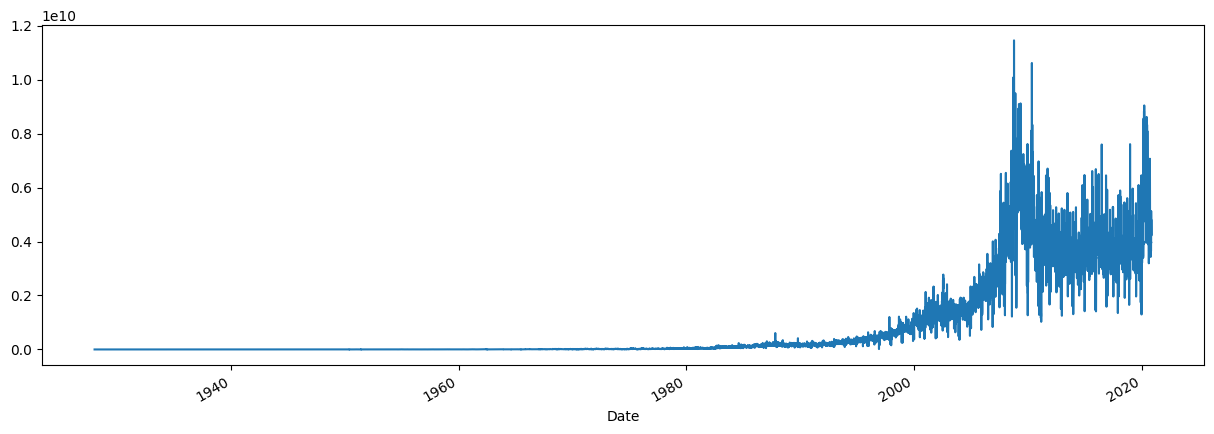

In [7]:
df['Volume'].plot(figsize=(15,5))
# Here u can notice that the major stock market trading started from around Year 2000

In [8]:
data = df[df['Volume']>0]
data.head(3)

# Here u can notice that the first stock market trading happened on "1950-01-03" with 1260000 Stocks being traded. 

Date   Open   High    Low  Close  Adj Close   Volume
Date                                                                 
1950-01-03 1950-01-03  16.66  16.66  16.66  16.66      16.66  1260000
1950-01-04 1950-01-04  16.85  16.85  16.85  16.85      16.85  1890000
1950-01-05 1950-01-05  16.93  16.93  16.93  16.93      16.93  2550000

In [9]:
# We'll consider the stock data from year 1987 onwards
data = data.loc['1987-10-28':]
data.shape

(8323, 7)

# Visualizing the Stock price Dataset 📈

<Axes: xlabel='Date'>

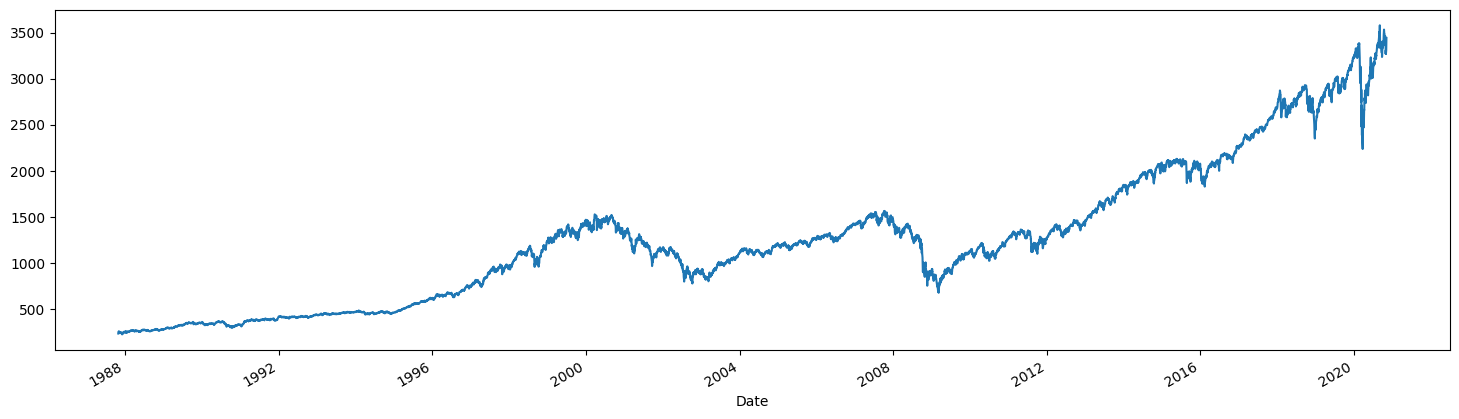

In [10]:
data['Close'].plot(figsize=(18,5))

<Axes: xlabel='Close', ylabel='Density'>

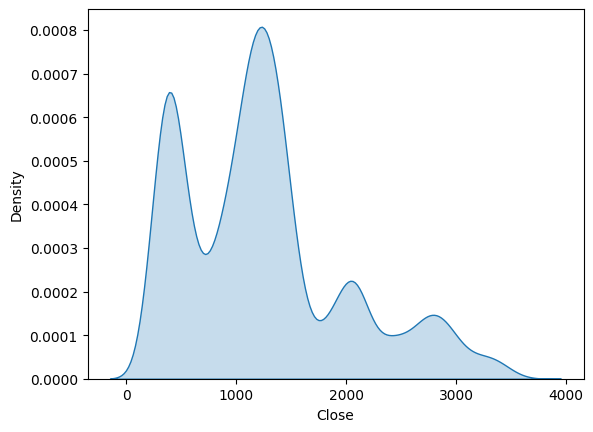

In [11]:
sns.kdeplot(data['Close'], fill=True)

In [11]:
# Adding Return Column

data['Return'] = (data['Adj Close']-data['Open'])/data['Open']

# making a copy for later use
stocks_data = data.copy()

data.sample(5)

Date         Open         High          Low        Close  \
Date                                                                        
2012-07-19 2012-07-19  1373.010010  1380.390015  1371.209961  1376.510010   
1991-10-08 1991-10-08   379.500000   381.230011   379.179993   380.670013   
1992-12-23 1992-12-23   440.290009   441.109985   439.029999   439.029999   
2006-04-12 2006-04-12  1286.569946  1290.930054  1286.449951  1288.119995   
1996-01-24 1996-01-24   612.789978   619.960022   612.789978   619.960022   

              Adj Close      Volume    Return  
Date                                           
2012-07-19  1376.510010  4043360000  0.002549  
1991-10-08   380.670013   177120000  0.003083  
1992-12-23   439.029999   234140000 -0.002862  
2006-04-12  1288.119995  1938100000  0.001205  
1996-01-24   619.960022   476380000  0.011701

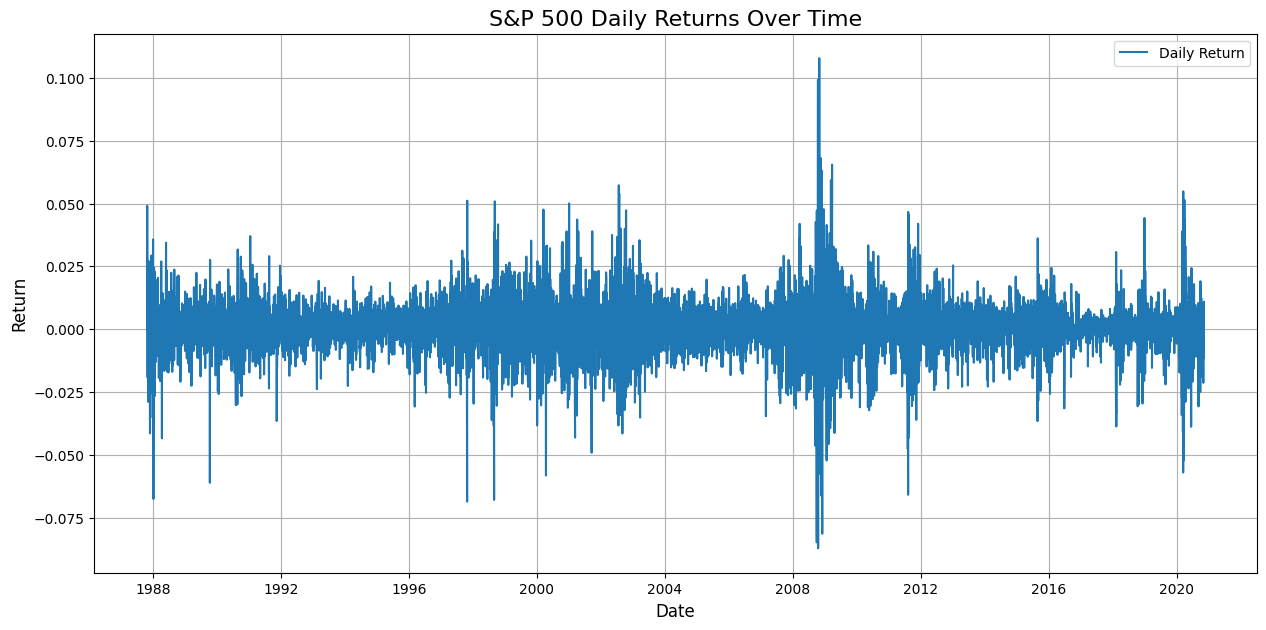

In [11]:
import matplotlib.pyplot as plt

# Create a figure and axes
plt.figure(figsize=(15, 7))

# Plot the 'Return' column against the Date index
plt.plot(data.index, data['Return'], label='Daily Return')

# Add a title and labels for clarity
plt.title('S&P 500 Daily Returns Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Return', fontsize=12)

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Candlestick Plots

* Ask any person in the financial domain, the best way to represent a stock in terms of a plot would be a Candlestick plot. 
* These are essentially little boxplots that represent the Open, High, Close and Low of a stock on a given time frame. 
* A red candlestick is a bearish candle (Closing price < Opening price) and a green candle is a bullish candle (Closing price > Opening price)

![](https://images.contentstack.io/v3/assets/blt38dd155f8beb7337/blt7c01ee0ced45a82c/62284bd13b0a2616b0dfb389/Bearish_and_Bullish_Candlestick.jpg)

In [14]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                    open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
fig.show()

## OHLC Plots 📈📉

* Similar to a candle stick, you can also plot OHLC plots that essentially deliver the same purpose of ploting the Open, High, Low and CLose of a stock but just in the different aesthetic. 
* Also, like matplotlib even plotly has a make_subplots function that can be used to combine plots together, in our cases the OHLC plot with the Volume

![](https://datavizcatalogue.com/methods/images/anatomy/SVG/OHLC_chart.svg)

In [15]:
fig = make_subplots(rows=2, cols=1)

#OHLC Plot
fig.add_trace(go.Ohlc(x=data.Date, open=data.Open, high=data.High, low=data.Low, close=data.Close, name='Price'),row=1, col=1)
#Volume PLot
fig.add_trace(go.Scatter(x=data.Date, y=data.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

# Time Series Data Analysis - Resampling

* In time series, data consistency is of prime importance, resampling ensures that the data is distributed with a consistent frequency. 
* Resampling can also provide a different perception of looking at the data.
* In other words, it can add additional insights about the data based on the resampling frequency.

**Upsampling** - Time series is resampled from low frequency to high frequency (Monthly to daily frequency). It involves filling or interpolating missing data

**Downsampling** - Time series is resampled from high frequency to low frequency (Weekly to monthly frequency). It involves aggregation of existing data.

Reference -> [How to use Resample in Pandas to enhance your time series data analysis](https://towardsdatascience.com/time-series-data-analysis-resample-1ff2224edec9)

In [12]:
# Here we'll be doing downsampling -> downsampling ex :- from months to years (decreasing data points)
# Where A represents "year end frequency" 
# max is the aggregator function

data.resample(rule='YE').max().tail(5)

# Here we got the max feature values of each year for the last 5 years

Date         Open         High          Low        Close  \
Date                                                                        
2016-12-31 2016-12-30  2270.540039  2277.530029  2266.149902  2271.719971   
2017-12-31 2017-12-29  2692.709961  2694.969971  2685.919922  2690.159912   
2018-12-31 2018-12-31  2936.760010  2940.909912  2927.110107  2930.750000   
2019-12-31 2019-12-31  3247.229980  3247.929932  3234.370117  3240.020020   
2020-12-31 2020-11-04  3564.739990  3588.110107  3535.229980  3580.840088   

              Adj Close      Volume    Return  
Date                                           
2016-12-31  2271.719971  7597450000  0.024414  
2017-12-31  2690.159912  5723920000  0.008097  
2018-12-31  2930.750000  7609010000  0.044255  
2019-12-31  3240.020020  6454270000  0.023283  
2020-12-31  3580.840088  9044690000  0.054876

<Axes: xlabel='Date'>

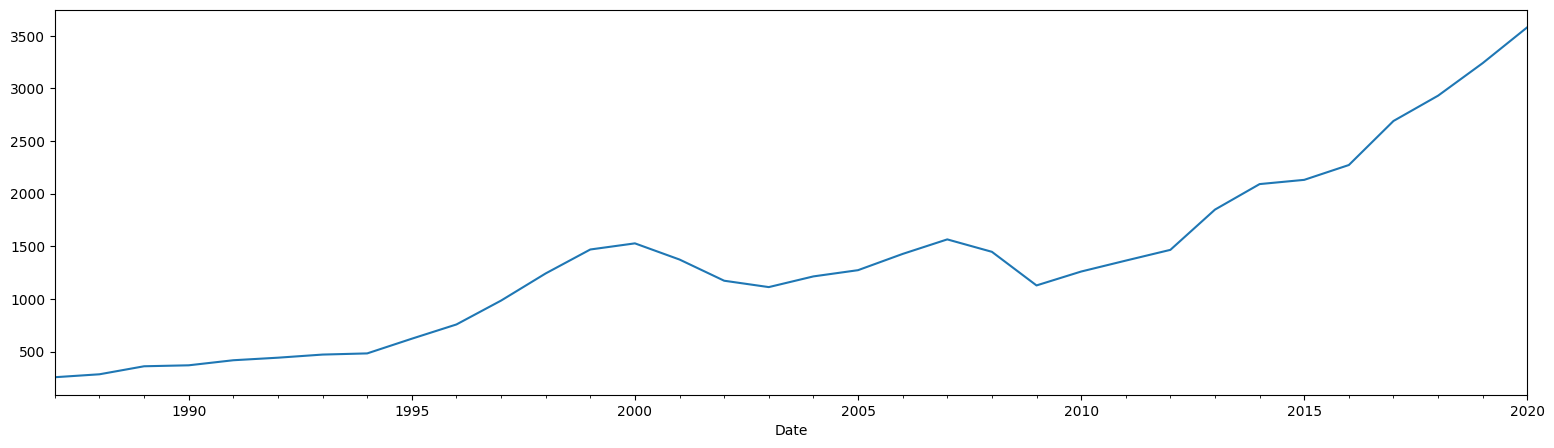

In [13]:
# Let's suppose if we want to visualize the max Close values of all years

data['Close'].resample(rule='YE').max().plot(figsize=(19,5))

We can also explore other rules according to our necessities.from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

# Technical Indicators 🔼🔽 
#### Indicators are best way to visualize a stock pattern.

This article will focus on a list of technical indicators that are widely used by professionals and scholars, and those that I believe are most beneficial in automated trading. The list of indicators are:
1. Simple Moving Average (Fast and Slow)

2. Exponential Moving Average (Fast and Slow)

3. Relative Strength Index (RSI)

4. Moving Average Convergence Divergence (MACD)

## Simple Moving Average

* Simple Moving Average is one of the most common technical indicators. 
* SMA calculates the average of prices over a given interval of time and is used to determine the trend of the stock. 
* As defined above, I will create a slow SMA (SMA_15) and a fast SMA (SMA_5). 
* Here these numerical values represents the time interval like 15days.

In [14]:
#SMA
data['SMA_5'] = data['Close'].rolling(5).mean().shift()
data['SMA_15'] = data['Close'].rolling(15).mean().shift()


# If u want to visualize between a range of specific dates u can do it like -> fig = go.Figure(layout_xaxis_range=['2019-06-04','2020-01-02'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.Date,y=data.SMA_5,name='SMA_5'))
fig.add_trace(go.Scatter(x=data.Date,y=data.SMA_15,name='SMA_15'))
fig.add_trace(go.Scatter(x=data.Date,y=data.Close,name='Close', opacity=0.3))
fig.show()

Although SMA is quite common, it contains a bias of giving equal weight to each value in the past.

## Exponential Moving Average (EMA)

* An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points.
* Basically what it means is that the newer stock price data has a higher weightage/significance on the price than older days.

In [15]:
#EMA

data['EMA_5'] = data['Close'].ewm(5).mean().shift()
data['EMA_15'] = data['Close'].ewm(15).mean().shift()

# If u want to visualize between a range of specific dates u can do it like -> fig = go.Figure(layout_xaxis_range=['2019-06-04','2020-01-02'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.Date,y=data.EMA_5,name='EMA_5'))
fig.add_trace(go.Scatter(x=data.Date,y=data.EMA_15,name='EMA_15'))
fig.add_trace(go.Scatter(x=data.Date,y=data.Close,name='Close', opacity=0.3))
fig.show()

In [16]:
# Now lets compare SMA's and EMA's

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.Date,y=data.SMA_5,name='SMA_5'))
fig.add_trace(go.Scatter(x=data.Date,y=data.EMA_5,name='EMA_5'))
fig.add_trace(go.Scatter(x=data.Date,y=data.Close,name='Close', opacity=0.3))
fig.show()
# EMA_5 is performing better than SMA_5 as it is closer to CLosing price of Stock.

## Relative Strength Index (RSI)

* A momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock. 
* If the RSI value is >70 then the stock is overbought and if <30 then its oversold.
* The basic formula is:

**RSI = 100 – [100 / ( 1 + (Average of Upward Price Change / Average of Downward Price Change ) ) ]**

Reference -> [Relative Strength Index (RSI)](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/RSI)

![](https://www.fidelity.com/bin-public/060_www_fidelity_com/images/LC/RSI1_602x345.png)           ![](https://www.fidelity.com/bin-public/060_www_fidelity_com/images/LC/RSI2_Diverg602x345.png)

In [17]:
def RSI(df,n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp<0]=0
    pricesDown[pricesDown>0]=0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp/rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

data['RSI'] = RSI(df).fillna(0)

fig = go.Figure(go.Scatter(x=data.Date,y=data.RSI,name='RSI'))
fig.show()

### Moving Average Convergence Divergence (MACD)¶
MACD uses two exponentially moving averages and creates a trend analysis based on their convergence or divergence.
The most commonly used MACD slow and fast signals are based on 26 days and 12 days respectively.
The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
Similar to RSI, MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line

In [18]:
data['EMA_12'] = pd.Series(data['Close'].ewm(span=12).mean())
data['EMA_26'] = pd.Series(data['Close'].ewm(span=26).mean())
data['MACD'] = pd.Series(data['EMA_12'] - data['EMA_26'])
data['MACD_signal'] = pd.Series(data.MACD.ewm(span=9,min_periods=9).mean())

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.Date,y=data.MACD,name='MACD'))
fig.add_trace(go.Scatter(x=data.Date,y=data.MACD_signal,name='MACD_signal'))
fig.show()

In [19]:
data.shape

(8323, 17)

In [20]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return',
       'SMA_5', 'SMA_15', 'EMA_5', 'EMA_15', 'RSI', 'EMA_12', 'EMA_26', 'MACD',
       'MACD_signal'],
      dtype='object')

In [21]:
print(data.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Return          0
SMA_5           5
SMA_15         15
EMA_5           1
EMA_15          1
RSI             0
EMA_12          0
EMA_26          0
MACD            0
MACD_signal     8
dtype: int64


**There are many other kind of Technical Indicators which we use to understand market Trend.**

1. [10 trading indicators every trader should know](https://www.ig.com/en/trading-strategies/10-trading-indicators-every-trader-should-know-190604)
2. [Best 25 Technical Indicators that Every Trader Should Know](https://www.elearnmarkets.com/blog/best-25-technical-indicators/)

---

# Time Series Decomposition

* We can decompose a time series into trend, seasonal amd remainder components, as mentioned in the earlier section. 
* The series can be decomposed as an additive or multiplicative combination of the base level, trend, seasonal index and the residual. 
* The seasonal_decompose in statsmodels is used to implements the decomposition.

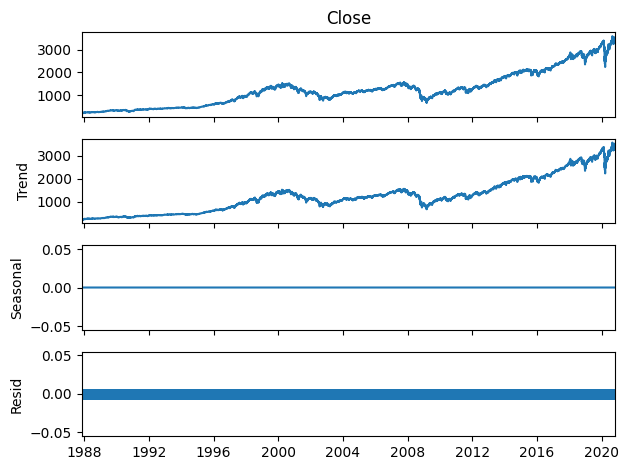

In [22]:
series = data.Close
result = seasonal_decompose(series, model='additive',period=1) # The frequncy is daily
figure = result.plot()

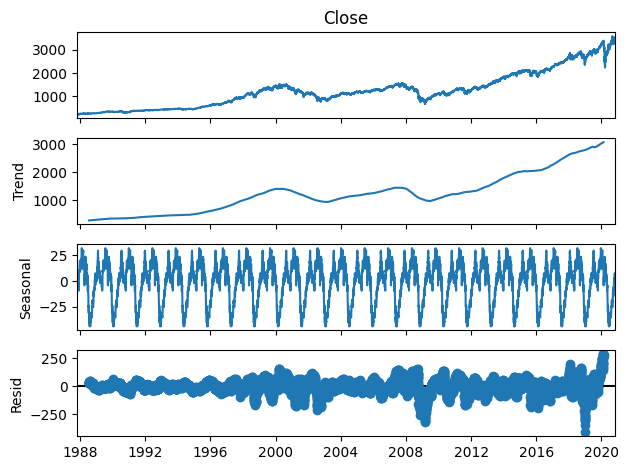

In [23]:
series = data.Close
result = seasonal_decompose(series, model='additive',period=365) # The frequncy is yearly
figure = result.plot()

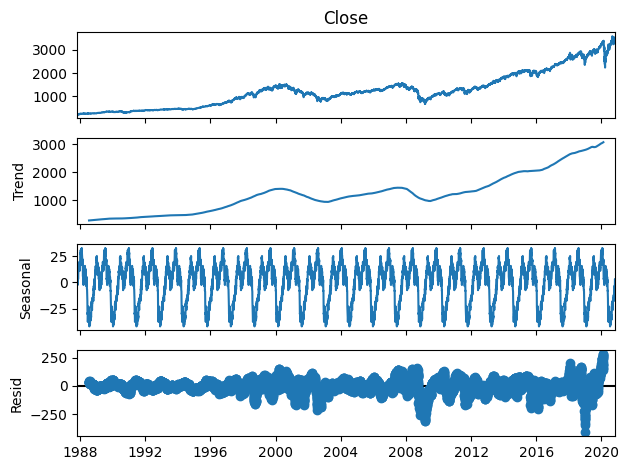

In [24]:
series = data.Close
result = seasonal_decompose(series, model='additive',period=366) # The frequncy is yearly
figure = result.plot()



*     There is clearly an upward trend in the above plot.
*     You can also see the uniform seasonal change.
*     Non-uniform noise that represent outliers and missing values


# Stationary Test / ADF (Augmented Dickey-Fuller) Test

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

*     Strong stationarity: is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
*     Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time

Stationarity is important as non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

* First, we need to check if a series is stationary or not because time series analysis only works with stationary data.
* The Dickey-Fuller test is one of the most popular statistical tests. 
* It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

**Null Hypothesis**: The series has a unit root (value of a =1)

**Alternate Hypothesis**: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

**If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.**

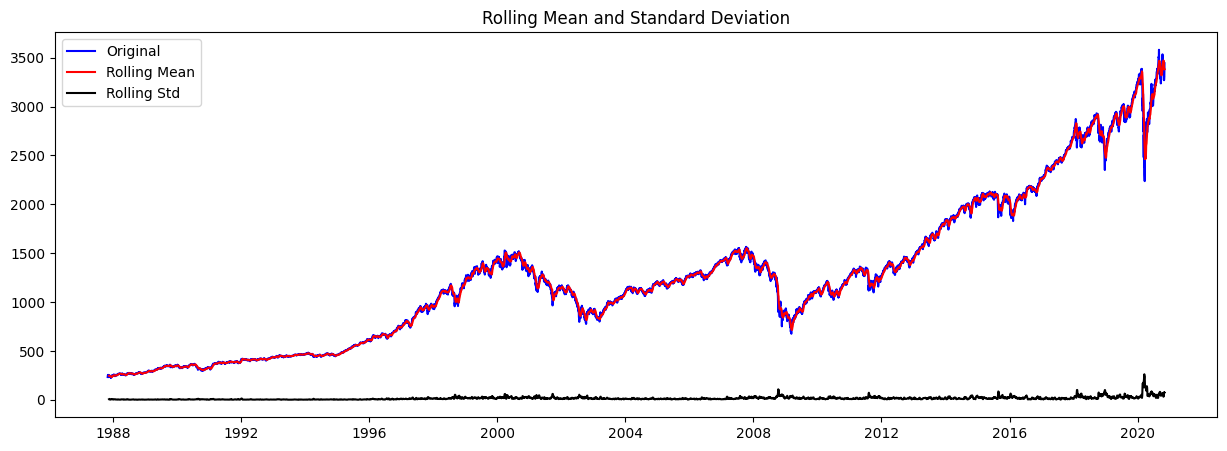

Results of dickey fuller test
Test Statistics                   1.211297
p-value                           0.996063
No. of lags used                 36.000000
Number of observations used    8286.000000
dtype: float64


In [25]:
#Test for staionarity
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    print(output)

test_stationarity(data['Close'])    



Through the above graph, we can see the increasing mean and standard deviation and hence **our series is not stationary.**

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

### DIFFERENCING:

    Differencing is a popular and widely used data transform for making time series data stationary.

    Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

    Differencing shifts ONE/MORE row towards downwards.

[Source Video](https://www.youtube.com/watch?v=nPYPyh20gGo)

In [19]:
data['Stocks First Difference']=data['Close']-data['Close'].shift(1)
data['Stocks Seasonal Difference']=data['Close']-data['Close'].shift(12)
data['Stocks Seasonal+Daily Difference']=data['Stocks Seasonal Difference']-data['Stocks Seasonal Difference'].shift(1)

In [49]:
adft = adfuller(data['Stocks First Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics               -1.626527e+01
p-value                        3.532446e-29
No. of lags used               3.500000e+01
Number of observations used    8.286000e+03
dtype: float64


In [50]:
adft = adfuller(data['Stocks Seasonal Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics               -1.276394e+01
p-value                        8.032575e-24
No. of lags used               3.700000e+01
Number of observations used    8.273000e+03
dtype: float64


In [51]:
adft = adfuller(data['Stocks Seasonal+Daily Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics                 -24.1143
p-value                           0.0000
No. of lags used                 37.0000
Number of observations used    8272.0000
dtype: float64


<Axes: xlabel='Date'>

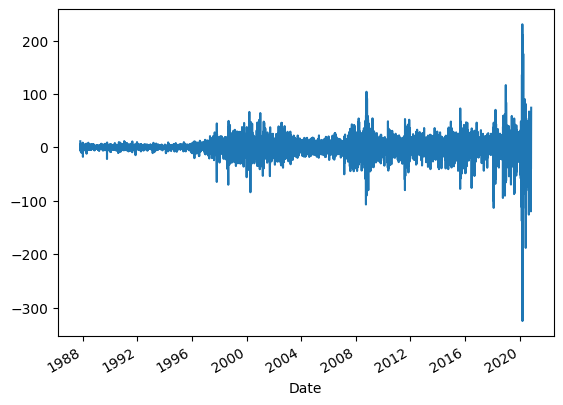

In [52]:
data['Stocks First Difference'].plot()


NOW OUR DATA IS STATIONARY.

We ll choose the simplest differencing that gives u stationary- so we take stock first difference

# Autocorrelation and Partial Autocorrelation

* Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
* Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

Source: [Quora](https://www.quora.com/What-is-the-difference-among-auto-correlation-partial-auto-correlation-and-inverse-auto-correlation-while-modelling-an-ARIMA-series)

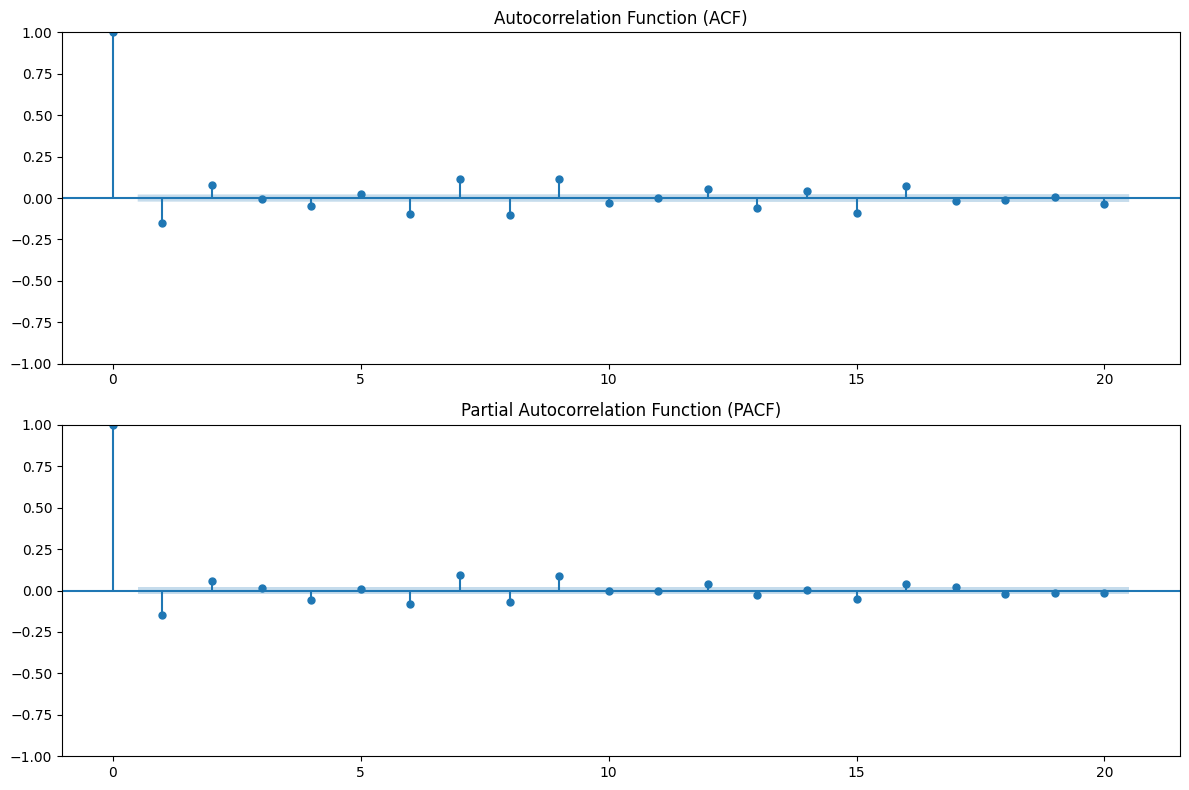

In [84]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ensure you use the differenced and cleaned data
differenced_data = data['Stocks First Difference'].dropna()

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(differenced_data, ax=ax1, lags=20) # You can adjust the number of lags
ax1.set_title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(differenced_data, ax=ax2, lags=20) # Match the lags for comparison
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


Here these two graphs will help you to find the p and q values.

    Partial AutoCorrelation Graph is for the p-value.
    AutoCorrelation Graph for the q-value.


## Split the data in train-test split:-

For time series, the split must be chronological. We'll use the first 80% of the data for training and the last 20% for testing.

In [26]:
# Calculate the split point
split_point = int(len(data['Close']) * 0.8)

# Create train and test sets
train = data['Close'][:split_point]
test = data['Close'][split_point:]

print(f"Training set length: {len(train)}")
print(f"Test set length: {len(test)}")

Training set length: 6658
Test set length: 1665


# ARIMA Model

* Autoregressive integrated moving average (ARIMA) models predict future values based on past values.
* ARIMA makes use of lagged moving averages to smooth time series data.
* They are widely used in technical analysis to forecast future security prices.

 According to the name, we can split the model into smaller components as follow:
1. **AR**: an AutoregRegressive model which represents a type of random process. The output of the model is linearly dependent on its own previous value i.e. some number of lagged data points or the number of past observations.
1. **I**: integrated here means the differencing step to generate stationary time series data, i.e. removing the seasonal and trend components.
1. **MA**: a Moving Average model which output is dependent linearly on the current and various past observations of a stochastic term.

ARIMA model is generally denoted as **ARIMA(p, d, q)** and parameter p, d, q are defined as follow:

1. **p**: the lag order or the number of time lag of autoregressive model AR(p)
1. **d**: degree of differencing or the number of times the data have had subtracted with past value
1. **q**: the order of moving average model MA(q)

Its time to choose parameters p,q,d for ARIMA model. The value of p,d, and q are choosen by observing the plots of ACF and PACF- as we did above- but here the plots are not giving any concrete results- so we r gonna do a grid search and pick the best ARIMA model (with the lowest AIC)


In [64]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress convergence and other warnings
warnings.filterwarnings("ignore")

# 1. Define the parameter ranges for p and q
p_values = range(0, 6)  # Autoregressive order
d_value = 1             # Set differencing order to 1
q_values = range(0, 6)  # Moving average order

# 2. Initialize variables to store the best results
best_aic = float("inf")
best_order = None
best_model = None

# 3. Loop through combinations of p and q with d=1
print(f"Starting Grid Search for ARIMA(p, {d_value}, q)...")
for p in p_values:
    for q in q_values:
        order = (p, d_value, q)
        try:
            # Fit the ARIMA model
            model = ARIMA(train, order=order)
            model_fit = model.fit()
            
            # If the current model's AIC is better, update the best results
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = order
                best_model = model_fit
            
            # Optional: print progress
            print(f'ARIMA{order} - AIC: {model_fit.aic:.2f}')

        except Exception as e:
            continue

# 4. Print the results
print("\nGrid Search Complete.")
print(f"Best ARIMA Order Found: {best_order}")
print(f"Lowest AIC Score: {best_aic:.2f}")

# Display the summary of the best model
print("\nSummary of the Best Model:")
print(best_model.summary())

Starting Grid Search for ARIMA(p, 1, q)...
ARIMA(0, 1, 0) - AIC: 51783.88
ARIMA(0, 1, 1) - AIC: 51755.32
ARIMA(0, 1, 2) - AIC: 51747.44
ARIMA(0, 1, 3) - AIC: 51748.79
ARIMA(0, 1, 4) - AIC: 51750.26
ARIMA(0, 1, 5) - AIC: 51740.79
ARIMA(1, 1, 0) - AIC: 51757.76
ARIMA(1, 1, 1) - AIC: 51742.98
ARIMA(1, 1, 2) - AIC: 51744.58
ARIMA(1, 1, 3) - AIC: 51746.16
ARIMA(1, 1, 4) - AIC: 51746.60
ARIMA(1, 1, 5) - AIC: 51741.79
ARIMA(2, 1, 0) - AIC: 51748.32
ARIMA(2, 1, 1) - AIC: 51744.60
ARIMA(2, 1, 2) - AIC: 51741.78
ARIMA(2, 1, 3) - AIC: 51747.95
ARIMA(2, 1, 4) - AIC: 51742.49
ARIMA(2, 1, 5) - AIC: 51734.87
ARIMA(3, 1, 0) - AIC: 51749.55
ARIMA(3, 1, 1) - AIC: 51751.52
ARIMA(3, 1, 2) - AIC: 51743.66
ARIMA(3, 1, 3) - AIC: 51750.48
ARIMA(3, 1, 4) - AIC: 51737.52
ARIMA(3, 1, 5) - AIC: 51731.61
ARIMA(4, 1, 0) - AIC: 51751.40
ARIMA(4, 1, 1) - AIC: 51746.64
ARIMA(4, 1, 2) - AIC: 51742.19
ARIMA(4, 1, 3) - AIC: 51737.02
ARIMA(4, 1, 4) - AIC: 51743.20
ARIMA(4, 1, 5) - AIC: 51719.05
ARIMA(5, 1, 0) - AIC: 51742

# ARIMA Model Selection and Interpretation

Here's a breakdown of thr grid search results for the ARIMA model, which was performed correctly on the **training data**.

---

## Grid Search Process

The script tested 36 different `ARIMA(p, 1, q)` models on your training data. The goal was to find the model with the **lowest AIC (Akaike Information Criterion)**. The AIC is a statistical measure that rewards models for fitting the data well but penalizes them for being overly complex.

### Key Finding:
- **Best Model**: The grid search identified **`ARIMA(5, 1, 4)`** as the best model.
- **Lowest AIC**: It achieved the lowest AIC score of **51717.77**.

This means that out of all the combinations tested, the `ARIMA(5, 1, 4)` offers the optimal balance between explaining the patterns in your training data and maintaining a reasonable level of complexity.

---

## Best Model Summary: `ARIMA(5, 1, 4)`

The summary table provides a detailed analysis of this winning model.

### 1. Model Overview
- **Model**: `ARIMA(5, 1, 4)`
  - `p=5`: It uses the last **five** data points (lags) to make a prediction (AR term).
  - `d=1`: It uses **one** level of differencing to make the series stationary.
  - `q=4`: It uses the last **four** forecast errors to improve the current prediction (MA term).
- **No. Observations**: The model was trained on **6,658** data points, which corresponds to the size of your training set.

### 2. Coefficient Analysis (The `coef` Table)

This section is crucial as it tells us which parts of the model are actually useful.

- **`coef`**: The numerical weight of each AR and MA term.
- **`P>|z|`**: The p-value for each coefficient. A value **below 0.05** indicates the term is statistically significant.

#### Interpretation:
- **Significant Terms**: Most of your AR and MA terms are highly significant (`p=0.000`). This is great!
- **Insignificant Terms**: However, two terms are **not statistically significant**:
  - **`ar.L1`**: The p-value is `0.446`.
  - **`ma.L1`**: The p-value is `0.102`.
- **What this means**: The first lag for both the AR and MA components (`ar.L1` and `ma.L1`) does not add significant predictive power to this specific model. While the overall model is the best according to AIC, a more advanced approach might involve refitting the model without these specific terms to see if it improves. For now, it's acceptable to keep them.

### 3. Residual Diagnostics (Bottom Table)

This section tests whether the model's errors (residuals) are random, which is a sign of a good fit.

- **Ljung-Box `Prob(Q)`**: The p-value is **`0.94`**.
  - This test checks for any remaining autocorrelation in the residuals. Since `0.94 > 0.05`, we conclude there is **no significant autocorrelation**.  **This is an excellent result** and means your model has captured the patterns well.
- **Jarque-Bera `Prob(JB)`**: The p-value is **`0.00`**.
  - This tests if the residuals are normally distributed. Since `0.00 < 0.05`, we conclude the residuals are **not normally distributed**. The `Kurtosis` of `10.47` (much > 3) points to "fat tails," which is very common in financial data where extreme events occur more frequently than a normal distribution would suggest.
- **Heteroskedasticity `Prob(H)`**: The p-value is **`0.00`**.
  - This tests if the variance of the errors is constant. Since `0.00 < 0.05`, we conclude the variance is **not constant**. This is also typical for financial data, which experiences periods of high and low volatility.

---

## Final Summary & Next Steps

1.  **A Good Model Was Found**: You've successfully identified the `ARIMA(5, 1, 4)` as the best candidate model for your training data. It effectively captures the autocorrelation in the series.
2.  **Acknowledge Imperfections**: The model's errors aren't perfectly "white noise" because of non-normality and changing variance. This is an expected and acceptable outcome when modeling real-world financial data with ARIMA.
3.  **Next Step**: You are now ready to use this trained model to **forecast** over the test set period and **evaluate** its performance against the actual, unseen data. This will be the ultimate test of your model's predictive power.

## Lets fit the model now:- 

Test RMSE: 771.83


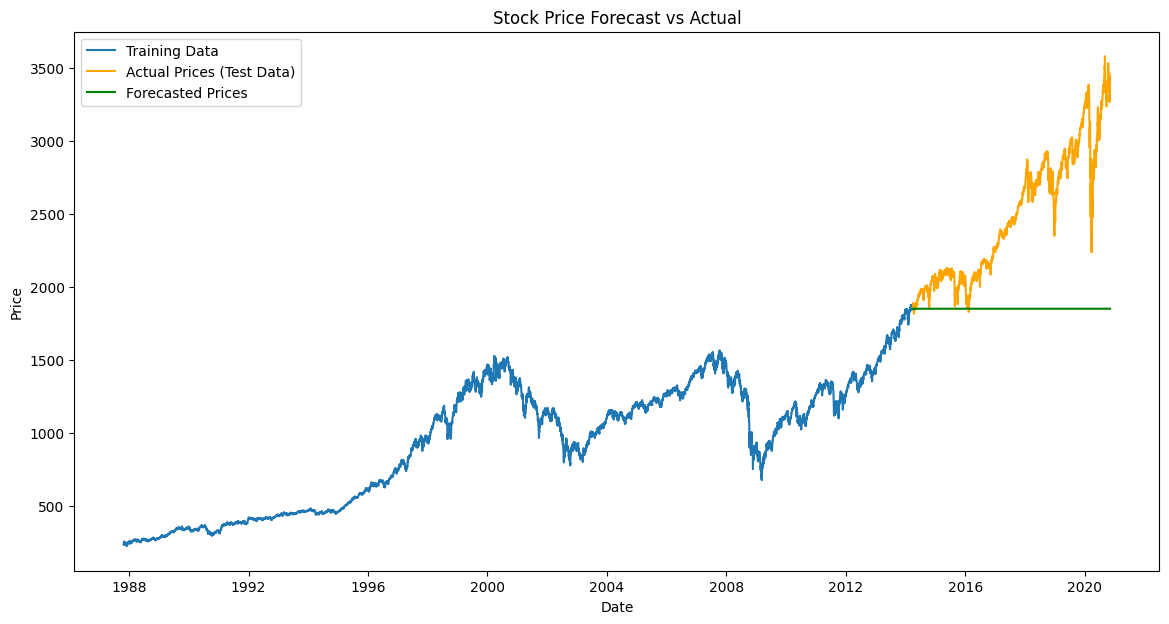

In [73]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Let's assume the best order from the new grid search is (5, 1, 4)
best_order = (5, 1, 4)

# Fit the model ONLY on the training data
model = ARIMA(train, order=best_order)
fitted_model = model.fit()

# Forecast the next 'n' steps, where n is the length of the test set
forecast = fitted_model.forecast(steps=len(test))

# The forecast object is a pandas Series, so we need to align its index with the test set for plotting
forecast.index = test.index


# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Test RMSE: {rmse:.2f}")

# Plot the results for a visual comparison
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Prices (Test Data)', color='orange')
plt.plot(forecast, label='Forecasted Prices', color='green')
plt.title('Stock Price Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Rolling ARIMA with walk forward validation and a sliding window

The process looks like this:

Train the model on the history.

Forecast the next 20 steps.

Store the 20 predictions.

Add the 20 actual values to the history.

Repeat.

This reduces the number of times you fit the model from 1,665 to about 84 (1665 / 20), which is a massive speed improvement.

Starting validation, refitting every 20 steps...
Forecasted up to step 20/1665
Forecasted up to step 40/1665
Forecasted up to step 60/1665
Forecasted up to step 80/1665
Forecasted up to step 100/1665
Forecasted up to step 120/1665
Forecasted up to step 140/1665
Forecasted up to step 160/1665
Forecasted up to step 180/1665
Forecasted up to step 200/1665
Forecasted up to step 220/1665
Forecasted up to step 240/1665
Forecasted up to step 260/1665
Forecasted up to step 280/1665
Forecasted up to step 300/1665
Forecasted up to step 320/1665
Forecasted up to step 340/1665
Forecasted up to step 360/1665
Forecasted up to step 380/1665
Forecasted up to step 400/1665
Forecasted up to step 420/1665
Forecasted up to step 440/1665
Forecasted up to step 460/1665
Forecasted up to step 480/1665
Forecasted up to step 500/1665
Forecasted up to step 520/1665
Forecasted up to step 540/1665
Forecasted up to step 560/1665
Forecasted up to step 580/1665
Forecasted up to step 600/1665
Forecasted up to step 620

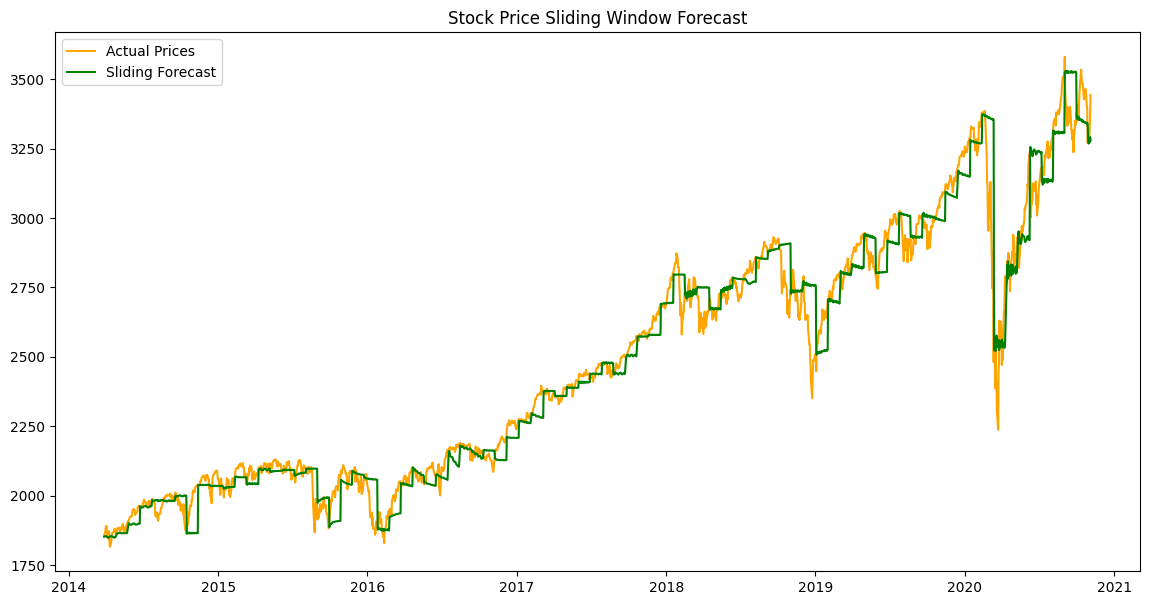

In [76]:
from math import ceil

# Setup is the same
window_size = 500
history = [x for x in train[-window_size:]]
predictions = []
best_order = (5, 1, 4)
refit_frequency = 20  # Refit the model every 20 steps

print(f"Starting validation, refitting every {refit_frequency} steps...")

for i in range(0, len(test), refit_frequency):
    # 1. Fit the model on the current history
    model = ARIMA(history, order=best_order)
    model_fit = model.fit()
    
    # 2. Forecast for the next 'refit_frequency' steps
    # Handle the last batch which might be smaller
    steps_to_forecast = min(refit_frequency, len(test) - i)
    forecast = model_fit.forecast(steps=steps_to_forecast)
    predictions.extend(forecast)
    
    # 3. Get the actual values for this period
    end_loc = i + steps_to_forecast
    actuals = test.iloc[i:end_loc]
    
    # 4. Update history with the new actuals and slide the window
    history.extend(actuals)
    history = history[-window_size:] # Keep the window size constant
    
    print(f'Forecasted up to step {end_loc}/{len(test)}')

# The evaluation and plotting code remains the same
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.2f}')

plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual Prices', color='orange')
plt.plot(test.index, predictions, label='Sliding Forecast', color='green')
plt.title('Stock Price Sliding Window Forecast')
plt.legend()
plt.show()

## Residual analysis for Rolling ARIMA

Generating residual diagnostic plots...


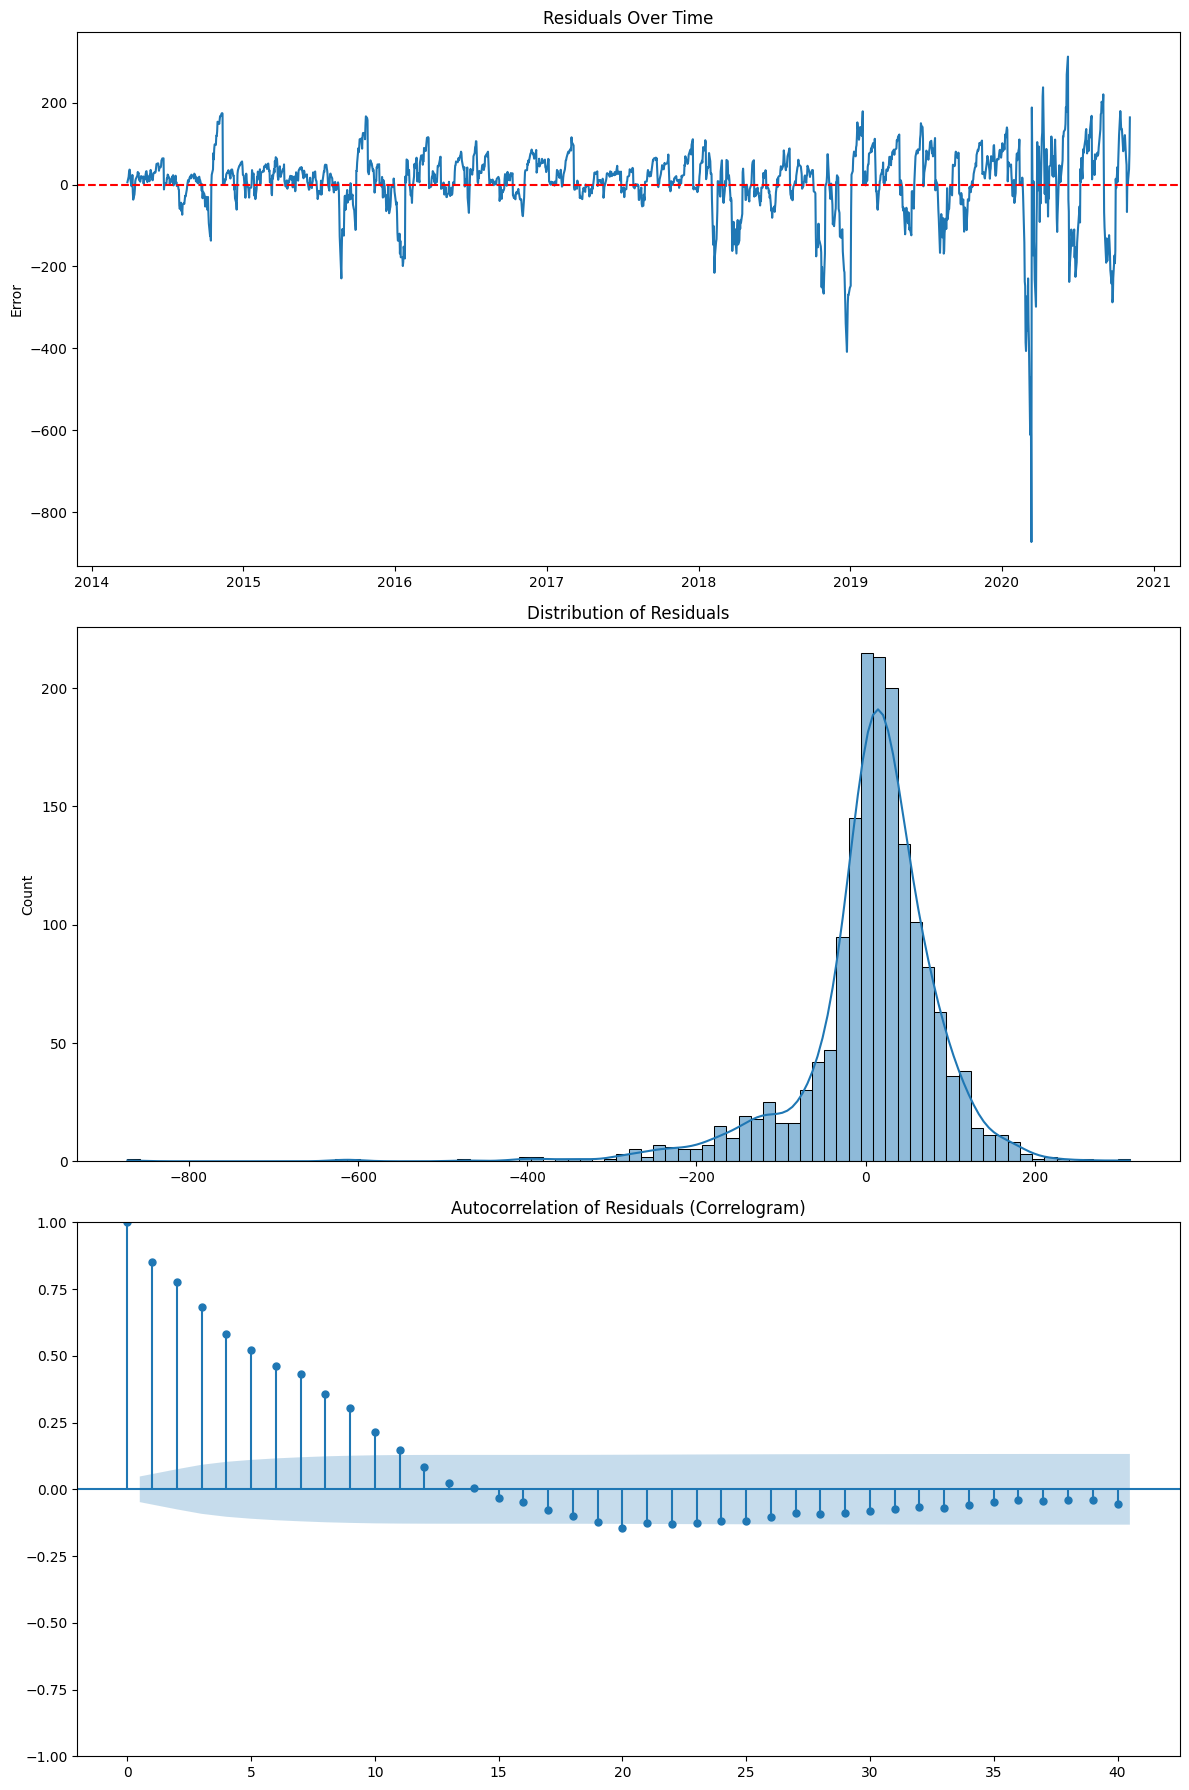


Residuals Summary Statistics:
count    1665.000000
mean        6.216547
std        83.059096
min      -872.634420
25%       -15.466981
50%        14.925784
75%        47.568697
max       312.420915
dtype: float64


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# --- Prerequisite: Ensure you have these variables from the previous step ---
# test: Your pandas Series of actual test values.
# predictions: Your list of forecasted values from the rolling forecast.
# -------------------------------------------------------------------------

# Step 1: Calculate the Residuals
# Convert predictions list to a pandas Series with the same index as the test set
predictions_series = pd.Series(predictions, index=test.index)
residuals = test - predictions_series

# Step 2: Create Diagnostic Plots
print("Generating residual diagnostic plots...")
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Residuals over time
axes[0].plot(residuals)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title('Residuals Over Time')
axes[0].set_ylabel('Error')

# Plot 2: Histogram of residuals to check for normality
sns.histplot(residuals, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Residuals')

# Plot 3: ACF of residuals to check for autocorrelation
plot_acf(residuals, ax=axes[2], lags=40)
axes[2].set_title('Autocorrelation of Residuals (Correlogram)')

plt.tight_layout()
plt.show()

# Optional: Print summary statistics of the residuals
print("\nResiduals Summary Statistics:")
print(residuals.describe())

# ARIMA Model: Residual Analysis Findings

## Executive Summary
The rolling `ARIMA(5, 1, 4)` model serves as a solid baseline, but a diagnostic analysis of its residuals reveals that the model fails to capture several key characteristics of the financial time series. The errors are not random white noise, which justifies the exploration of more advanced models.

---

### Key Findings:

1.  **Volatility Clustering is Present**
    -   **Observation**: The "Residuals Over Time" plot shows that the magnitude of the errors is not constant. There are distinct periods of high volatility (large errors) and low volatility (small errors), most notably the extreme error spike in 2020.
    -   **Conclusion**: This pattern, known as heteroskedasticity, indicates the model's predictive accuracy is inconsistent and degrades significantly during periods of market stress.

2.  **Errors are Not Normally Distributed**
    -   **Observation**: The histogram of the residuals is sharply peaked with "fat tails" on both ends, which deviates significantly from a standard bell curve.
    -   **Conclusion**: The model's errors do not follow a normal distribution. Extreme prediction errors occur more frequently than would be expected under normal assumptions, a typical feature of financial data.

3.  **Significant Autocorrelation Remains**
    -   **Observation**: The ACF (Correlogram) plot is the most critical finding. It displays numerous statistically significant spikes that extend far beyond the confidence interval, particularly at the initial lags.
    -   **Conclusion**: The residuals are highly correlated with their own past values. This is clear evidence that the ARIMA model has **failed to capture all the predictable, linear patterns** in the data.

## Overall Assessment
The ARIMA model is insufficient as it leaves predictable information behind in the residuals. This provides a strong, data-driven justification to proceed with more complex models capable of capturing non-linear dynamics and the remaining autocorrelation.

---

---

# LSTM

Long Short-Term Memory (LSTM) models are a type of recurrent neural network capable of learning sequences of observations. This makes them a deep learning network well suited for time series forecasting. 

## (1 day rolling forecasting)

Building and training the initial LSTM model...
Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0143
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0022
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0019
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0016
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0015
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0015
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0014
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0012
Epoch 9/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0010
Epoch 10/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0010
Epoch 11/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 9.3997e-04
Epoch 12/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 8.5733e-04
Epoch 13/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 8.3269e-04
Epoch 14/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/ste

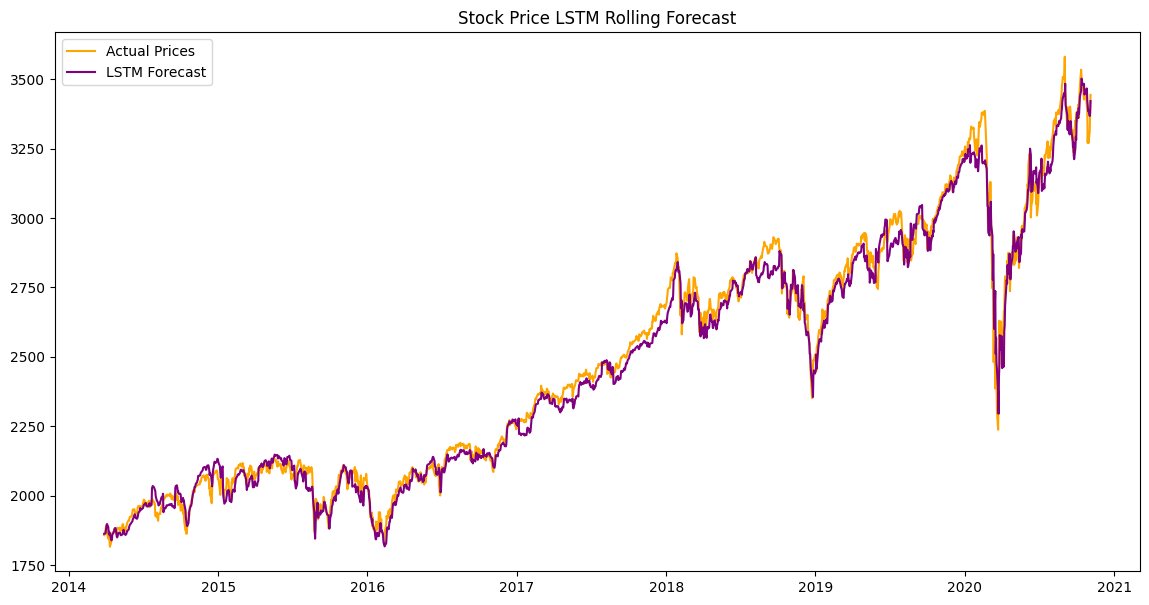

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- 1. Setup and Data Preparation ---

# Use the same train/test split as before
split_point = int(len(data['Close']) * 0.8)
train = data['Close'][:split_point]
test = data['Close'][split_point:]

# Scale the data: LSTMs are sensitive to the scale of the data
# Fit the scaler ONLY on the training data to avoid data leakage
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train.values.reshape(-1, 1))

# Define how many past days of data the LSTM will use to make a prediction
n_steps = 60 # Using 60 days of historical data

# Create a helper function to structure the data for the LSTM
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

# Create the training dataset
X_train, y_train = create_dataset(scaled_train, n_steps)

# Reshape input to be [samples, time steps, features] as required by LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# --- 2. Build and Train the Initial LSTM Model ---

print("Building and training the initial LSTM model...")
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(n_steps, 1)),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the entire training set
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


# --- 3. The Rolling Validation Loop ---

print("Starting rolling validation with LSTM...")
# Initialize history with the scaled training data
history = scaled_train.flatten().tolist()
predictions = []
refit_frequency = 20 # Same frequency as your ARIMA test

for i in range(0, len(test)):
    # Prepare the input for prediction: take the last n_steps from history
    input_data = np.array(history[-n_steps:]).reshape(1, n_steps, 1)

    # Predict the next step
    scaled_prediction = model.predict(input_data, verbose=0)
    
    # Inverse transform the prediction to get the actual price value
    prediction = scaler.inverse_transform(scaled_prediction)[0][0]
    predictions.append(prediction)
    
    # Get the actual value and update history
    actual_value = test.iloc[i]
    scaled_actual = scaler.transform([[actual_value]])[0][0]
    history.append(scaled_actual)
    
    # Periodically refit the model with new data (online learning)
    if (i + 1) % refit_frequency == 0:
        print(f"Refitting LSTM at step {i+1}/{len(test)}")
        # Convert the recent history back into a training format
        recent_history_scaled = np.array(history[-len(X_train):]) # Use a large chunk of recent history
        X_update, y_update = create_dataset(recent_history_scaled.reshape(-1,1), n_steps)
        X_update = np.reshape(X_update, (X_update.shape[0], X_update.shape[1], 1))
        
        # Refit the model for one epoch on the new data
        model.fit(X_update, y_update, epochs=1, batch_size=32, verbose=0)


# --- 4. Evaluate and Plot ---

print('Validation Complete.')
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE (LSTM): {rmse:.2f}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual Prices', color='orange')
plt.plot(test.index, predictions, label='LSTM Forecast', color='purple')
plt.title('Stock Price LSTM Rolling Forecast')
plt.legend()
plt.show()

## Residual Analysis:-

Generating LSTM residual diagnostic plots...


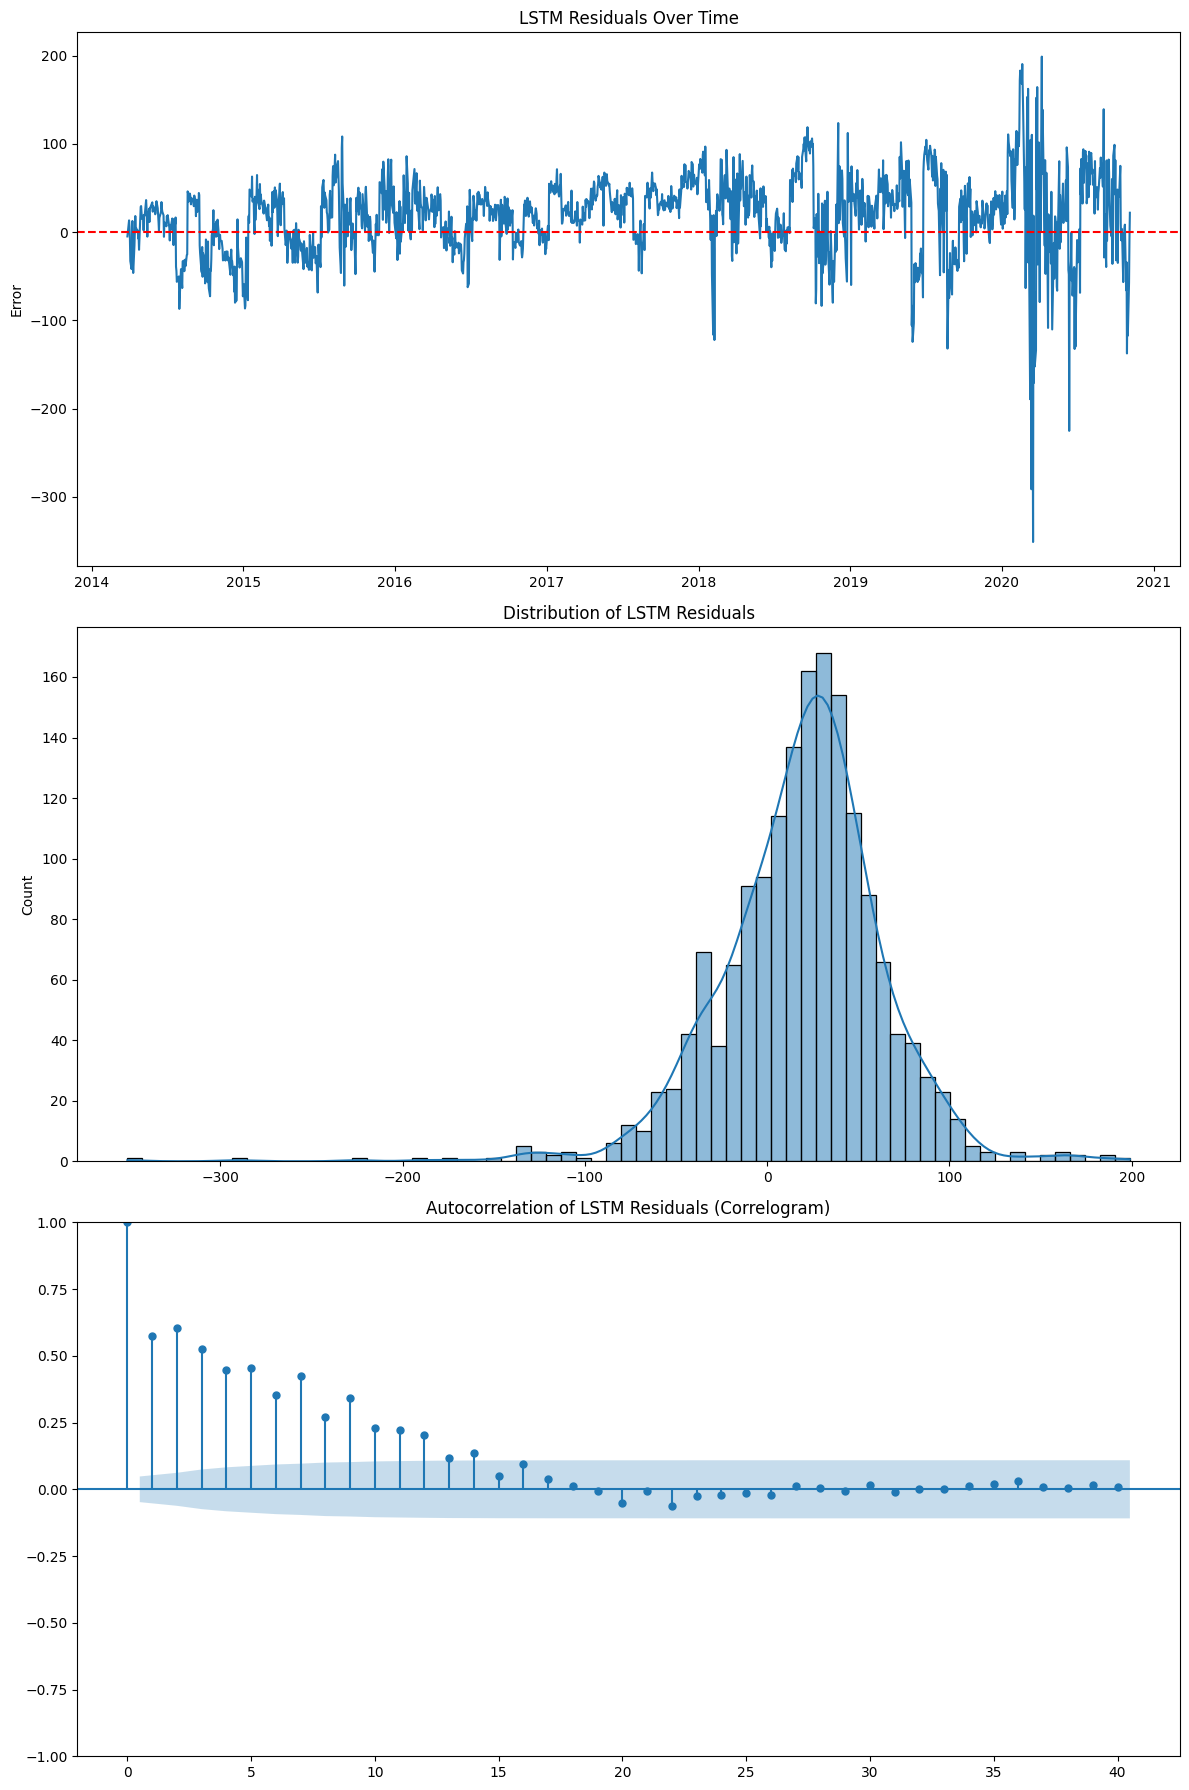


LSTM Residuals Summary Statistics:
count    1665.000000
mean       19.264365
std        44.281847
min      -351.065918
25%        -4.780884
50%        22.756348
75%        44.492188
max       199.009766
dtype: float64


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# Step 1: Calculate the Residuals
predictions_series = pd.Series(predictions, index=test.index)
residuals = test - predictions_series

# Step 2: Create Diagnostic Plots
print("Generating LSTM residual diagnostic plots...")
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Residuals over time
axes[0].plot(residuals)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title('LSTM Residuals Over Time')
axes[0].set_ylabel('Error')

# Plot 2: Histogram of residuals
sns.histplot(residuals, kde=True, ax=axes[1])
axes[1].set_title('Distribution of LSTM Residuals')

# Plot 3: ACF of residuals
plot_acf(residuals, ax=axes[2], lags=40)
axes[2].set_title('Autocorrelation of LSTM Residuals (Correlogram)')

plt.tight_layout()
plt.show()

# Optional: Print summary statistics
print("\nLSTM Residuals Summary Statistics:")
print(residuals.describe())

## LSTM with 20 days forecasting

Initial training...
Epoch 1/50


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.0601
Epoch 2/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0061
Epoch 3/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0040
Epoch 4/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0033
Epoch 5/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0026
Epoch 6/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0023
Epoch 7/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0022
Epoch 8/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0019
Epoch 9/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0018
Epoch 10/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0016
Epoch 11/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0016
Epoch 12/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0014
Epoch 13/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0013
Epoch 14/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0013
Epoch 15/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step

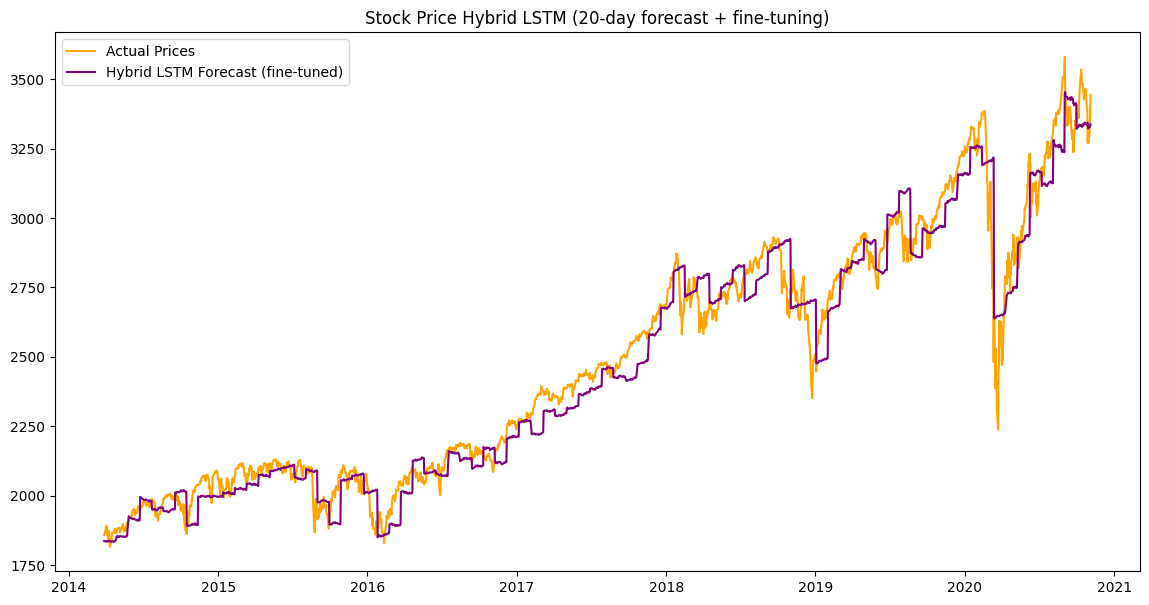

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- 1. Setup and Data Preparation ---

split_point = int(len(data['Close']) * 0.8)
train = data['Close'][:split_point]
test = data['Close'][split_point:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train.values.reshape(-1, 1))

n_steps = 60     # lookback
horizon = 20     # forecast horizon
refit_frequency = 40  # fine-tune every 40 test points

# Function to create dataset for multi-step forecasting
def create_dataset(dataset, time_steps=1, horizon=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps - horizon + 1):
        X.append(dataset[i:(i + time_steps), 0])
        y.append(dataset[i + time_steps : i + time_steps + horizon, 0])
    return np.array(X), np.array(y)

# Initial training dataset
X_train, y_train = create_dataset(scaled_train, n_steps, horizon)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# --- 2. Build Model Function ---
def build_model(n_steps, horizon):
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(n_steps, 1)),
        Dropout(0.2),
        LSTM(units=50),
        Dropout(0.2),
        Dense(units=horizon)   # predict 20 values at once
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


# --- 3. Initial Training ---
print("Initial training...")
model = build_model(n_steps, horizon)
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


# --- 4. Rolling Forecast with Fine-tuning ---
print("Starting rolling validation with fine-tuning...")

history = scaled_train.flatten().tolist()
predictions = []

for i in range(0, len(test), horizon):
    # Prepare input (last 60 days)
    input_data = np.array(history[-n_steps:]).reshape(1, n_steps, 1)

    # Forecast next 20 days
    scaled_forecast = model.predict(input_data, verbose=0)[0]
    forecast = scaler.inverse_transform(scaled_forecast.reshape(-1, 1)).flatten()

    # Keep only as many as remain in the test set
    steps_to_forecast = min(horizon, len(test) - i)
    predictions.extend(forecast[:steps_to_forecast])

    # Update history with ACTUAL values
    actual_values = test.iloc[i:i + steps_to_forecast].values
    scaled_actuals = scaler.transform(actual_values.reshape(-1, 1)).flatten()
    history.extend(scaled_actuals)

    # --- Periodic fine-tuning (not rebuilding) ---
    if (i + horizon) % refit_frequency == 0 and i + horizon < len(test):
        print(f"Fine-tuning model at step {i+horizon}/{len(test)}")

        # Use recent history to create new training data
        recent_history_scaled = np.array(history[-len(scaled_train):]).reshape(-1, 1)

        X_update, y_update = create_dataset(recent_history_scaled, n_steps, horizon)
        X_update = np.reshape(X_update, (X_update.shape[0], X_update.shape[1], 1))

        # Continue training the SAME model (fine-tune)
        model.fit(X_update, y_update, epochs=1, batch_size=32, verbose=0)


# --- 5. Evaluate ---
print('Validation complete.')
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE (Hybrid LSTM-20day Fine-tuned): {rmse:.2f}')

# --- 6. Plot ---
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual Prices', color='orange')
plt.plot(test.index, predictions, label='Hybrid LSTM Forecast (fine-tuned)', color='purple')
plt.title('Stock Price Hybrid LSTM (20-day forecast + fine-tuning)')
plt.legend()
plt.show()


Generating LSTM residual diagnostic plots...


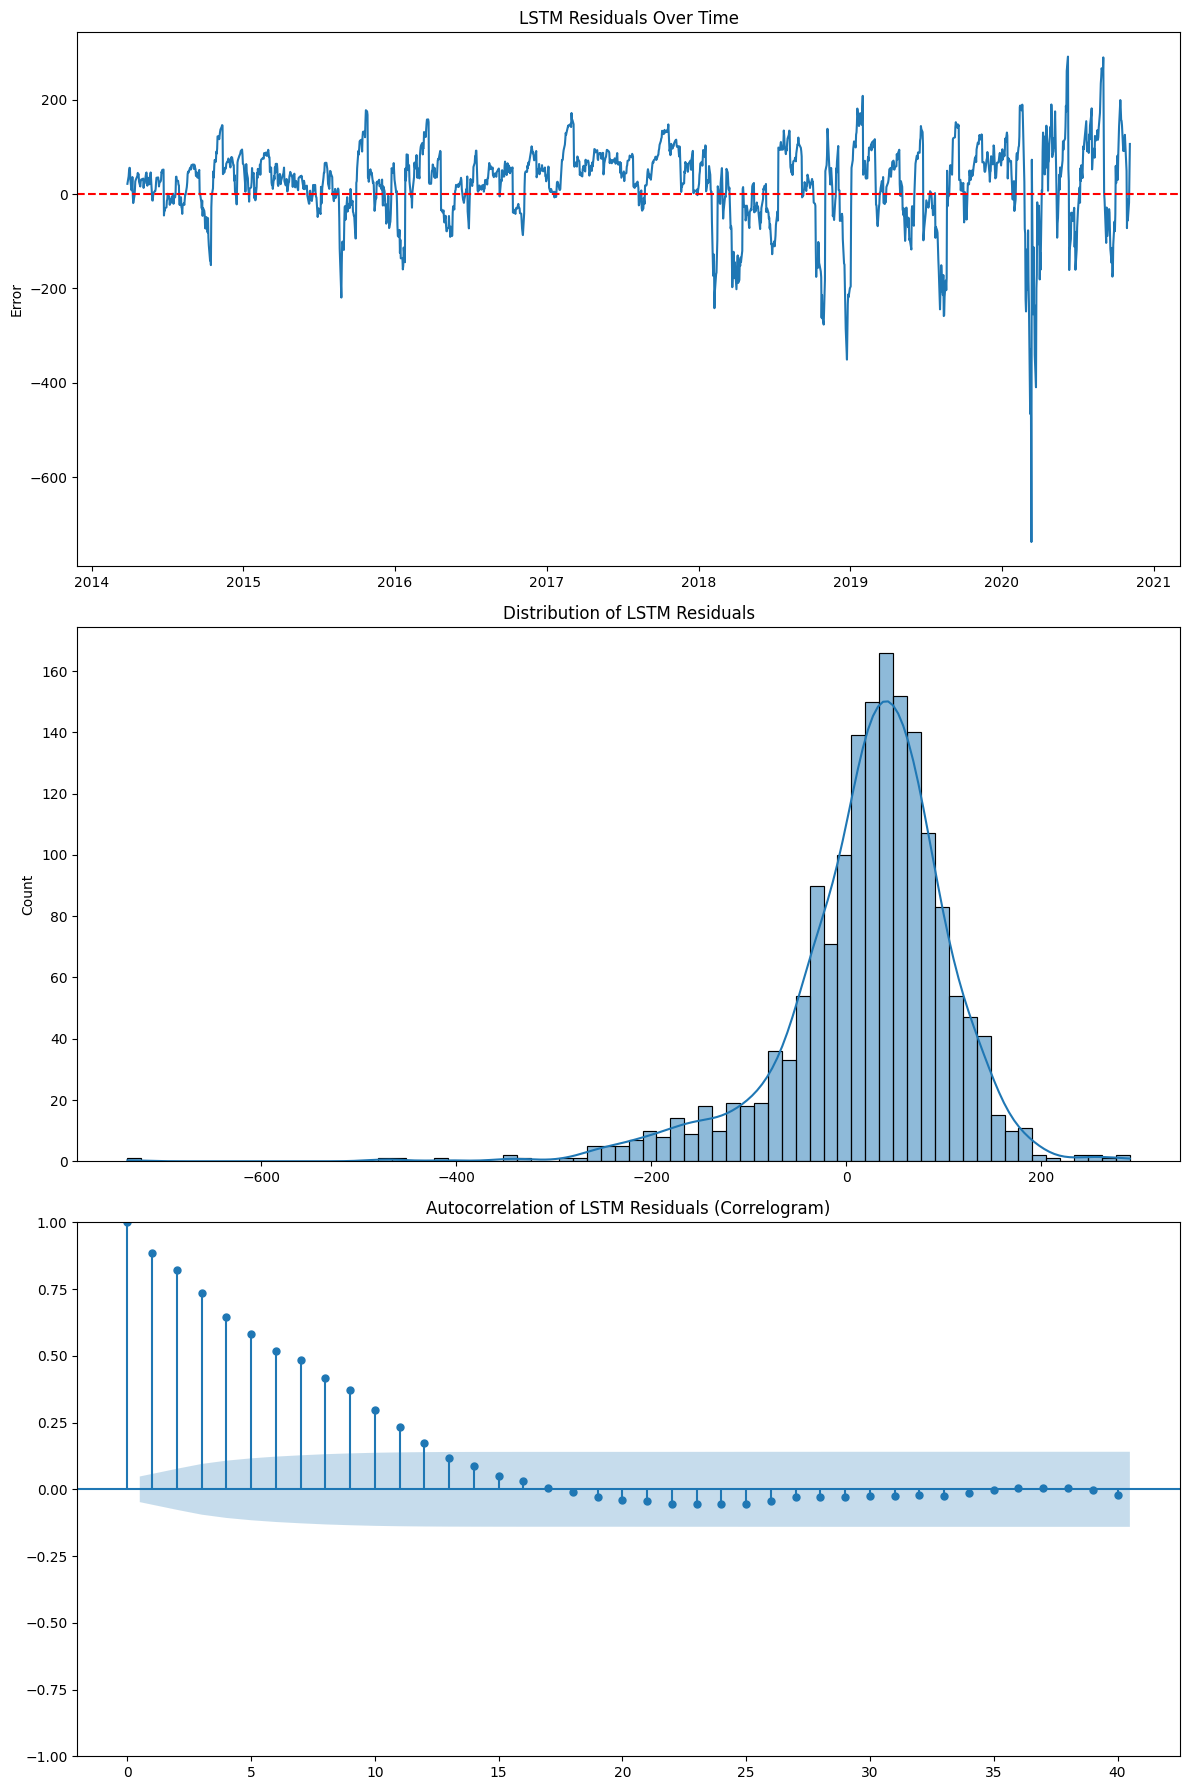


LSTM Residuals Summary Statistics:
count    1665.000000
mean       22.345389
std        84.995562
min      -737.179443
25%       -13.626587
50%        34.072632
75%        71.922119
max       291.068604
dtype: float64


In [29]:

# Step 1: Calculate the Residuals
predictions_series = pd.Series(predictions, index=test.index)
residuals = test - predictions_series

# Step 2: Create Diagnostic Plots
print("Generating LSTM residual diagnostic plots...")
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Residuals over time
axes[0].plot(residuals)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title('LSTM Residuals Over Time')
axes[0].set_ylabel('Error')

# Plot 2: Histogram of residuals
sns.histplot(residuals, kde=True, ax=axes[1])
axes[1].set_title('Distribution of LSTM Residuals')

# Plot 3: ACF of residuals
plot_acf(residuals, ax=axes[2], lags=40)
axes[2].set_title('Autocorrelation of LSTM Residuals (Correlogram)')

plt.tight_layout()
plt.show()

# Optional: Print summary statistics
print("\nLSTM Residuals Summary Statistics:")
print(residuals.describe())

---

---

## Multivariate LSTM

In [86]:
data.head(20)

Date        Open        High         Low       Close  \
Date                                                                    
1987-10-28 1987-10-28  233.190002  238.580002  226.259995  233.279999   
1987-10-29 1987-10-29  233.309998  246.690002  233.279999  244.770004   
1987-10-30 1987-10-30  244.770004  254.039993  244.770004  251.789993   
1987-11-02 1987-11-02  251.729996  255.750000  249.149994  255.750000   
1987-11-03 1987-11-03  255.750000  255.750000  242.779999  250.820007   
1987-11-04 1987-11-04  250.809998  251.000000  246.339996  248.960007   
1987-11-05 1987-11-05  248.929993  256.089996  247.720001  254.479996   
1987-11-06 1987-11-06  254.490005  257.209991  249.679993  250.410004   
1987-11-09 1987-11-09  250.410004  250.410004  243.009995  243.169998   
1987-11-10 1987-11-10  243.139999  243.169998  237.639999  239.000000   
1987-11-11 1987-11-11  239.009995  243.860001  239.000000  241.899994   
1987-11-12 1987-11-12  241.929993  249.899994  241.899994  248.520004   
1987-11-13 1987-11-13  248.539993  249.419998  245.639999  245.639999   
1987-11-16 1987-11-16  245.690002  249.539993  244.979996  246.759995   
1987-11-17 1987-11-17  246.729996  246.759995  240.809998  243.039993   
1987-11-18 1987-11-18  243.089996  245.550003  240.669998  245.550003   
1987-11-19 1987-11-19  245.539993  245.550003  239.699997  240.050003   
1987-11-20 1987-11-20  240.039993  242.009995  235.889999  242.000000   
1987-11-23 1987-11-23  242.000000  242.990005  240.500000  242.990005   
1987-11-24 1987-11-24  242.979996  247.899994  242.979996  246.389999   

             Adj Close     Volume    Return       SMA_5      SMA_15  \
Date                                                                  
1987-10-28  233.279999  279400000  0.000386         NaN         NaN   
1987-10-29  244.770004  258100000  0.049119         NaN         NaN   
1987-10-30  251.789993  303400000  0.028680         NaN         NaN   
1987-11-02  255.750000  176000000  0.015970         NaN         NaN   
1987-11-03  250.820007  227800000 -0.019277         NaN         NaN   
1987-11-04  248.960007  202500000 -0.007376  247.282001         NaN   
1987-11-05  254.479996  226000000  0.022295  250.418002         NaN   
1987-11-06  250.410004  228290000 -0.016032  252.360001         NaN   
1987-11-09  243.169998  160690000 -0.028913  252.084003         NaN   
1987-11-10  239.000000  184310000 -0.017027  249.568002         NaN   
1987-11-11  241.899994  147850000  0.012092  247.204001         NaN   
1987-11-12  248.520004  206280000  0.027239  245.791998         NaN   
1987-11-13  245.639999  174920000 -0.011668  244.600000         NaN   
1987-11-16  246.759995  164340000  0.004355  243.645999         NaN   
1987-11-17  243.039993  148240000 -0.014956  244.363998         NaN   
1987-11-18  245.550003  158270000  0.010120  245.171997  246.552666   
1987-11-19  240.050003  157140000 -0.022359  245.901999  247.370666   
1987-11-20  242.000000  189170000  0.008165  244.207999  247.056000   
1987-11-23  242.990005  143160000  0.004091  243.479999  246.403334   
1987-11-24  246.389999  199520000  0.014034  242.726001  245.552667   

                 EMA_5      EMA_15        RSI      EMA_12      EMA_26  \
Date                                                                    
1987-10-28         NaN         NaN  26.133139  233.279999  233.279999   
1987-10-29  233.279999  233.279999  31.359646  239.503752  239.245963   
1987-10-30  239.547274  239.210324  34.277752  244.299075  243.752911   
1987-11-02  244.390548  243.676892  33.855287  247.913684  247.106773   
1987-11-03  248.047242  246.993333  34.686182  248.703322  247.967887   
1987-11-04  248.819872  247.860498  35.750760  248.765710  248.166601   
1987-11-05  248.854988  248.074533  41.316919  250.040833  249.289406   
1987-11-06  250.155415  249.175887  61.760652  250.117873  249.469962   
1987-11-09  250.210705  249.367149  53.049248  248.743336  248.536169   
1987-11-10  248.755159  248.488022  38.80803

In [87]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return',
       'SMA_5', 'SMA_15', 'EMA_5', 'EMA_15', 'RSI', 'EMA_12', 'EMA_26', 'MACD',
       'MACD_signal', 'Stocks First Difference', 'Stocks Seasonal Difference',
       'Stocks Seasonal+Daily Difference'],
      dtype='object')

In [88]:
print(data.isna().sum())

Date                                 0
Open                                 0
High                                 0
Low                                  0
Close                                0
Adj Close                            0
Volume                               0
Return                               0
SMA_5                                5
SMA_15                              15
EMA_5                                1
EMA_15                               1
RSI                                  0
EMA_12                               0
EMA_26                               0
MACD                                 0
MACD_signal                          8
Stocks First Difference              1
Stocks Seasonal Difference          12
Stocks Seasonal+Daily Difference    13
dtype: int64


In [89]:
data.shape

(8323, 20)

Building and training the multivariate LSTM model on recent data...


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss: 0.0236
Epoch 2/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0054
Epoch 3/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0044
Epoch 4/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0035
Epoch 5/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0028
Epoch 6/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0024
Epoch 7/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0026
Epoch 8/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0021
Epoch 9/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0020
Epoch 10/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0018
Epoch 11/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0018
Epoch 12/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0017
Epoch 13/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0015
Epoch 14/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0016
Epoch 15/50
206/206 ━━━━━━━━━━━━━━━━━━

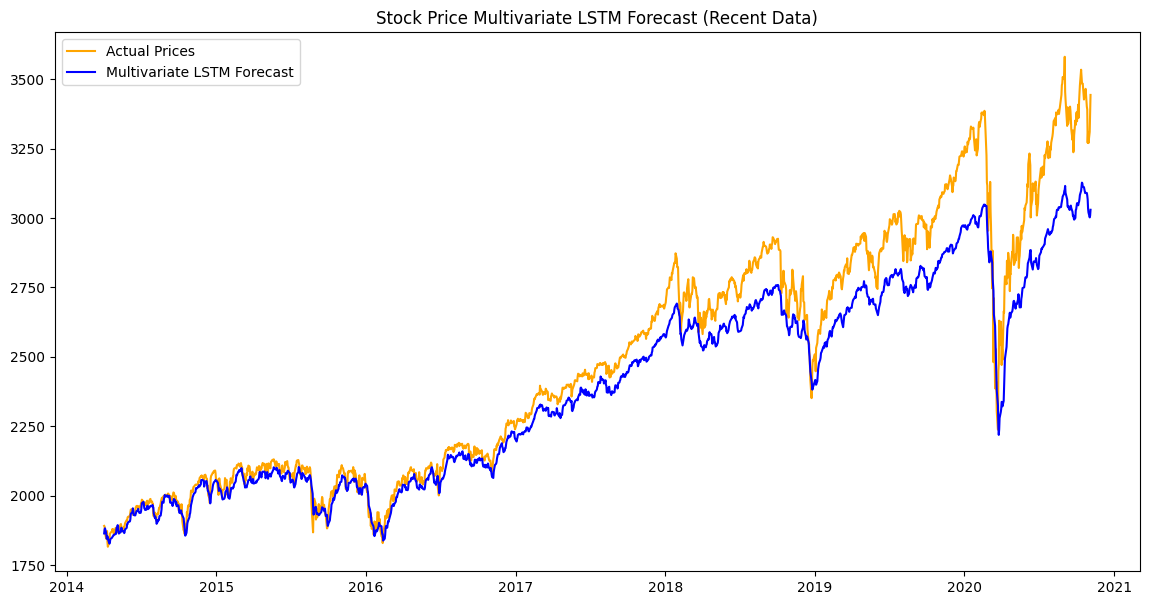

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# First, drop any rows with NaN values that were created by the technical indicators
data.dropna(inplace=True)

# Define the feature and target columns
features_to_use = [
    'Open', 'High', 'Low', 'Volume', 'SMA_5', 'SMA_15', 'EMA_5', 'EMA_15',
    'RSI', 'EMA_12', 'EMA_26', 'MACD', 'MACD_signal'
]

target_column = 'Close'

# Create the features (X) and target (y) DataFrames
features = data[features_to_use]
target = data[target_column]

# Perform the train-test split
split_point = int(len(features) * 0.8)
X_train, X_test = features[:split_point], features[split_point:]
y_train, y_test = target[:split_point], target[split_point:]


# --- The rest of your code (Steps 2 through 6) remains exactly the same ---
# --- 2. Scale the Data ---
feature_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

target_scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))

# --- 3. Create the Supervised Multivariate Dataset ---
n_steps = 60

def create_multivariate_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_reshaped, y_train_reshaped = create_multivariate_dataset(X_train_scaled, y_train_scaled, n_steps)

# --- 4. Build and Train the Multivariate LSTM ---
n_features = X_train.shape[1]

print("Building and training the multivariate LSTM model on recent data...")
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(n_steps, n_features)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_reshaped, y_train_reshaped, epochs=50, batch_size=32, verbose=1)

# --- 5. The Rolling Validation Loop for Multivariate Data ---
print("Starting rolling validation with the multivariate LSTM...")
history = list(X_train_scaled)
predictions = []

for i in range(len(X_test_scaled)):
    input_data = np.array(history[-n_steps:]).reshape(1, n_steps, n_features)
    scaled_prediction = model.predict(input_data, verbose=0)
    prediction = target_scaler.inverse_transform(scaled_prediction)[0][0]
    predictions.append(prediction)
    history.append(X_test_scaled[i])

# --- 6. Evaluate and Plot ---
print('Validation Complete.')
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Test RMSE (Multivariate LSTM on Recent Data): {rmse:.2f}')

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='orange')
plt.plot(y_test.index, predictions, label='Multivariate LSTM Forecast', color='blue')
plt.title('Stock Price Multivariate LSTM Forecast (Recent Data)')
plt.legend()
plt.show()

### Residual Analysis

Generating multivariate LSTM residual diagnostic plots...


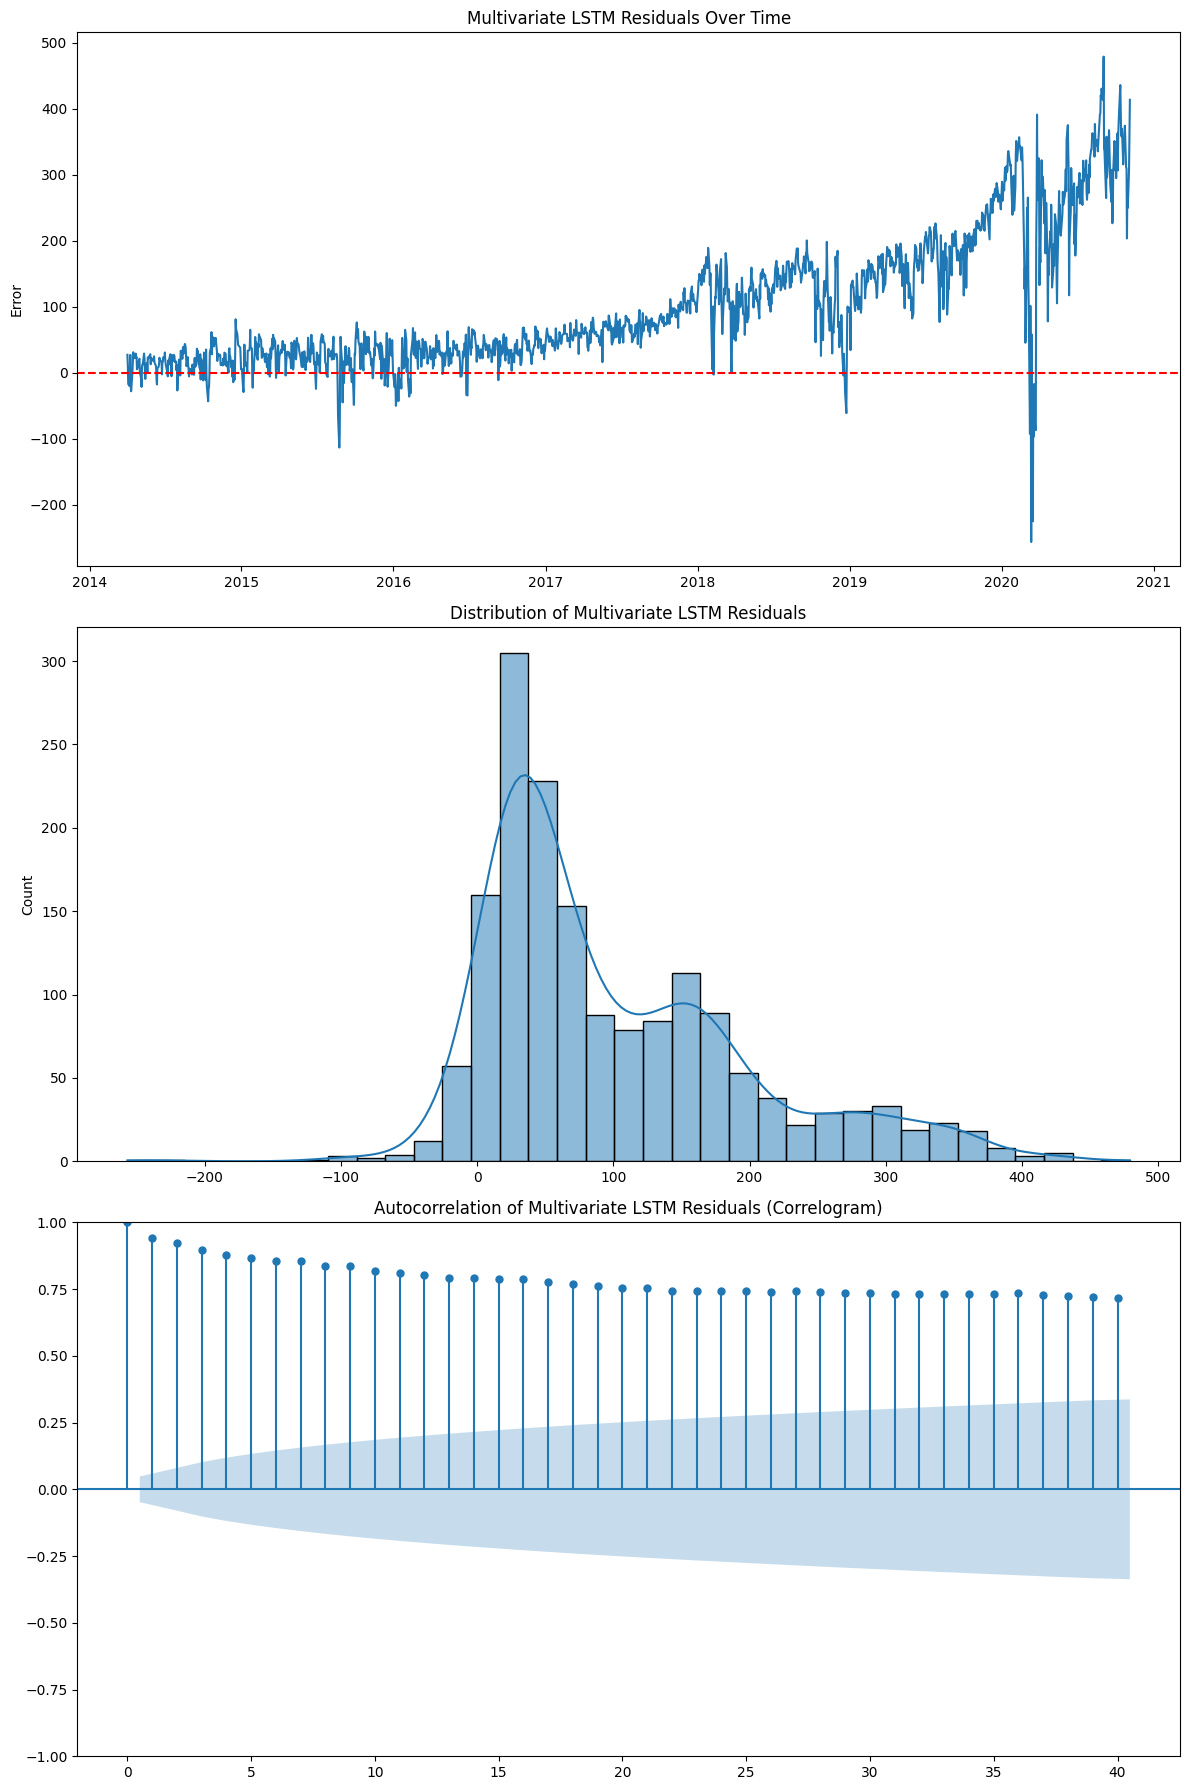


Multivariate LSTM Residuals Summary Statistics:
count    1662.000000
mean       99.967196
std        97.330425
min      -256.779052
25%        28.601623
50%        64.620483
75%       155.760132
max       479.290527
dtype: float64


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# --- Prerequisite: Ensure you have these variables from the previous step ---
# y_test: Your pandas Series of actual test values.
# predictions: Your list of forecasted values from the multivariate LSTM.
# -------------------------------------------------------------------------

# Step 1: Calculate the Residuals
predictions_series = pd.Series(predictions, index=y_test.index)
residuals = y_test - predictions_series

# Step 2: Create Diagnostic Plots
print("Generating multivariate LSTM residual diagnostic plots...")
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Residuals over time
axes[0].plot(residuals)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title('Multivariate LSTM Residuals Over Time')
axes[0].set_ylabel('Error')

# Plot 2: Histogram of residuals
sns.histplot(residuals, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Multivariate LSTM Residuals')

# Plot 3: ACF of residuals
plot_acf(residuals, ax=axes[2], lags=40)
axes[2].set_title('Autocorrelation of Multivariate LSTM Residuals (Correlogram)')

plt.tight_layout()
plt.show()

# Optional: Print summary statistics of the residuals
print("\nMultivariate LSTM Residuals Summary Statistics:")
print(residuals.describe())

---

# Project Summary: Evaluating Forecasting Models for Stock Price Prediction

This project aimed to identify the optimal model for stock price forecasting by comparing classical statistical methods with deep learning techniques across different forecast horizons and feature sets. The project evaluated four distinct models: a rolling ARIMA, a static multivariate LSTM, a rolling univariate LSTM for single-day-ahead predictions, and a univariate LSTM for 20-day-ahead predictions.

The analysis revealed that the choice of the best model is critically dependent on the forecast horizon. For **short-term, single-day predictions, the rolling univariate LSTM was the champion model**, achieving the lowest Root Mean Squared Error (RMSE) of **48.28**. However, for **longer-term, 20-day forecasts, the classical rolling ARIMA model (RMSE: 83.27) demonstrated slightly better accuracy and consistency** than its deep learning counterpart, the 20-day LSTM (RMSE: 87.86).

A crucial insight from this project is that a model's **adaptiveness**—its ability to retrain on new data—is more critical for accuracy than the sheer volume of features. The static multivariate LSTM, despite being fed more data points like Volume and RSI, performed the worst (RMSE: 139.50), underscoring that the forecasting strategy is as vital as the model architecture itself.

---

## Model Performance Comparison

The following table summarizes the key performance metrics for the four primary models evaluated.

| Metric                   | Rolling ARIMA (20-Day) | 1-Day Univariate LSTM | 20-Day Univariate LSTM | Static Multivariate LSTM |
| :----------------------- | :--------------------- | :-------------------- | :--------------------- | :----------------------- |
| **Test RMSE** | **83.27** | **48.28** | 87.86                  | 139.50                   |
| **Error Std Dev** | 83.06                  | **44.28** | 85.00                  | 97.33                    |
| **Mean Error** | **6.22** | 19.26                 | 22.35                  | 99.97                    |

---

## Final Inferences from All Four Models

### 1. Primary Comparison (20-Day Forecast): Rolling ARIMA vs. LSTM

The core comparison for a longer forecast horizon was between the rolling ARIMA and the 20-day LSTM, as both were tasked with predicting 20 days ahead.

- **Forecast Accuracy**: The **rolling ARIMA (RMSE 83.27) was marginally more accurate** than the 20-day LSTM (RMSE 87.86).
- **Error Statistics**: The ARIMA's errors were also slightly more consistent, with a lower mean error (6.22 vs. 22.35) and a slightly lower standard deviation (83.06 vs. 85.00).

**Finding**: For longer-term forecasting in this dataset, the simpler, adaptive classical model (ARIMA) provided a more reliable and accurate prediction than the more complex deep learning model.

### 2. The Impact of Forecast Horizon: 1-Day vs. 20-Day LSTM

The project highlighted a clear trade-off between prediction accuracy and the length of the forecast horizon.

- The **1-day-ahead LSTM (RMSE 48.28)** was exceptionally accurate, capturing immediate market dynamics effectively. Its residual analysis showed low, unstructured autocorrelation, indicating it had learned the underlying patterns well.
- The **20-day-ahead LSTM (RMSE 87.86)** saw its error nearly double compared to its 1-day counterpart, showing that predictive power diminishes significantly as the model tries to forecast further into an uncertain future.

**Finding**: While LSTMs are powerful, their effectiveness is highly sensitive to the forecast horizon. They excel at short-term predictions but lose their edge over classical models as the prediction window widens.

### 3. The Importance of Adaptiveness over Features

The final experiment confirmed that the modeling strategy is more important than the number of input features.

- The **static multivariate LSTM (RMSE 139.50)** performed the worst out of all models. Despite having access to additional features like Volume, RSI, and MACD, its inability to adapt to new data made it fundamentally flawed.
- Its residual plots showed severe issues, including a strong positive bias (mean error: 99.97) and extremely high autocorrelation, proving it failed to learn the core patterns from the data.

**Finding**: An adaptive model that continuously learns from new data (like the rolling ARIMA and rolling LSTMs) will far outperform a static model with more features. This emphasizes that for financial time series, **keeping the model current is paramount.**